# NETWORK ANALYSIS OF SHAKESPEARE'S MACBETH

In [55]:
%matplotlib inline 
%load_ext autoreload
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Text Preparation

The text file of Shakespeare's Macbeth ('corpora/ShakespeareMacbethOrig_from_PG.txt') was downloaded from Project Gutenberg and it was modified in such a way that all the names of characters (as "actors" in the social networks sense) appear as such in a uniform way. This modified text ('corpora/ShakespeareMacbethOrig_from_PG_mod.txt') is the one processed here.

In [2]:
fileName = 'corpora/ShakespeareMacbethOrig_from_PG_mod.txt'
f=open(fileName,'r')

In [3]:
%autoreload 2
from testy2 import *
from syntheticThreeLayerGraph_time import synthetic_multi_level_dict,plot_graph_dict,plot_graph_k_n, plot_total_graph_with_weights

act_dict,u,pers_l,pers_dict,pact,lact=create_dict_of_acts(fileName)

print 'Characters (actors) appearing in Macbeth:'
print
for actor in pers_l:
    print actor
print
print 'The number of characters (actors) in Macbeth is', len(pers_l)


Characters (actors) appearing in Macbeth:

ANGUS
BANQUO
CAPTAIN
CATHNESS
DONALBAIN
DOCTOR
ENGLISH DOCTOR
FIRST APPARITION
FIRST MURDERER
FIRST WITCH
FLEANCE
GENTLEWOMAN
HECAT
LADY MACBETH
LENNOX
LORD
LORDS
MACBETH
MACDUFF
MALCOLM
MENTETH
MESSENGER
MESSENGER TO WIFE
MURDERERS
OLD MAN
PORTER
ROSS
SECOND APPARITION
SECOND MURDERER
SECOND WITCH
SERVANT
SEYTON
SEYWARD
SOLDIERS
SON
THIRD APPARITION
THIRD MURDERER
THIRD WITCH
THIRD WITCH
WIFE
WITCHES
YOUNG SEYWARD

The number of characters (actors) in Macbeth is 42


## Detection of characters (actors) and conversational relationships (ties) among them

The relationship (tie) among the above characters (actors) detected (automatically) here is the so-called "conversational relationship" which is defined whenever two characters are co-participating in a conversation. Actually, due to the structure of Shakespeare's printed text (in Project Gutenberg), the unit of conversation (or conversational chunk) used here is the body of the text which is delimited between two empty lines. In this way, the resulting network is represented by a weighted undirected graph, where tha weight of a edge joining two characters is the total number of conversational chaunks that these characters are involved in. Moreover, we are decomposing the network into slices (or layers) according to one of the five Acts during which the measured coversations take place.

In [4]:
graph_dic,ract_dic,pernode_dict,nodper_dic,cnum=create_graph_dict(act_dict,pers_l,pers_dict,u)
G, list_of_Graphs_final, Gagr, edgeList ,nmap ,mapping,k,n=synthetic_multi_level_dict(graph_dic,pernode_dict,nodper_dic,ract_dic,No_isolates=True)
conver_rel = 0

for k,v in graph_dic.items():
    print nx.info(v)
    conver_rel += len(v.edges())
    print
    
print 'Characters (actors) appearing in Macbeth in all conversational relationships in all Acts:'  
print
for i in pernode_dict:
    print i
print
print 'The total number of characters (actors) appearing in Macbeth in all conversational relationships in all Acts is', len(pernode_dict.keys())
print 
print 'The total number of conversational relationships (edges) among characters (actors) \
taking place in all Acts of Macbeth is', conver_rel

Name: Act I
Type: Graph
Number of nodes: 39
Number of edges: 9
Average degree:   0.4615

Name: Act II
Type: Graph
Number of nodes: 39
Number of edges: 8
Average degree:   0.4103

Name: Act IV
Type: Graph
Number of nodes: 39
Number of edges: 17
Average degree:   0.8718

Name: Act III
Type: Graph
Number of nodes: 39
Number of edges: 17
Average degree:   0.8718

Name: Act V
Type: Graph
Number of nodes: 39
Number of edges: 14
Average degree:   0.7179

Characters (actors) appearing in Macbeth in all conversational relationships in all Acts:

DONALBAIN
SERVANT
OLD MAN
THIRD WITCH
YOUNG SEYWARD
MESSENGER
WITCHES
SOLDIERS
SECOND MURDERER
LORDS
LENNOX
MACDUFF
HECAT
DOCTOR
MALCOLM
LADY MACBETH
SON
THIRD MURDERER
BANQUO
FIRST WITCH
LORD
ROSS
FIRST APPARITION
PORTER
SEYWARD
ANGUS
FIRST MURDERER
GENTLEWOMAN
FLEANCE
SECOND APPARITION
WIFE
SEYTON
MACBETH
MESSENGER TO WIFE
SECOND WITCH
THIRD APPARITION
CAPTAIN
MURDERERS
ENGLISH DOCTOR

The total number of characters (actors) appearing in Macbeth in al

## Macbeth Network Visualizations

The number of actors in Macbeth's Act I is 8
The number of conversational relationships in Macbeth's Act I is 9


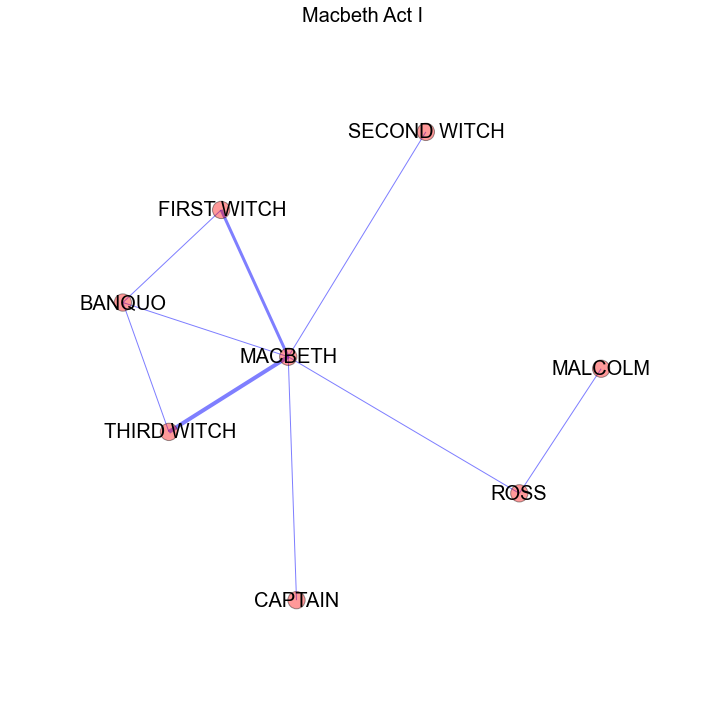

In [71]:
GI = graph_dic[ract_dic[cnum[0]]]
print "The number of actors in Macbeth's Act I is", len(GI.nodes())
print "The number of conversational relationships in Macbeth's Act I is", len(GI.edges())
import pickle
try:
    f=open('positions_of_Mc_Shake.dmp')
    pos_dict=pickle.load(f)
except:
    pos_dict={}
    pos=nx.spring_layout(GI,scale=50)
    pos_dict[0]=pos
GI.remove_nodes_from(nx.isolates(GI))
labels={i:v for v,i in pernode_dict.items() if i in GI.nodes()}
weights={(i[0],i[1]):i[2]['weight'] for i in GI.edges(data=True) }#if all((i[0],i[1])) in G.nodes() }
plt.figure(figsize=(12,12))
pos=nx.spring_layout(GI,scale=50)
# pos_dict[0]=pos
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(GI,pos=pos,with_labels=False,alpha=0.4)
labe=nx.draw_networkx_labels(GI,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(GI,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=0.2)
plt.title("Macbeth Act I",fontsize=20)
kk=plt.axis('off')

The number of actors in Macbeth's Act II is 7
The number of conversational relationships in Macbeth's Act II is 8


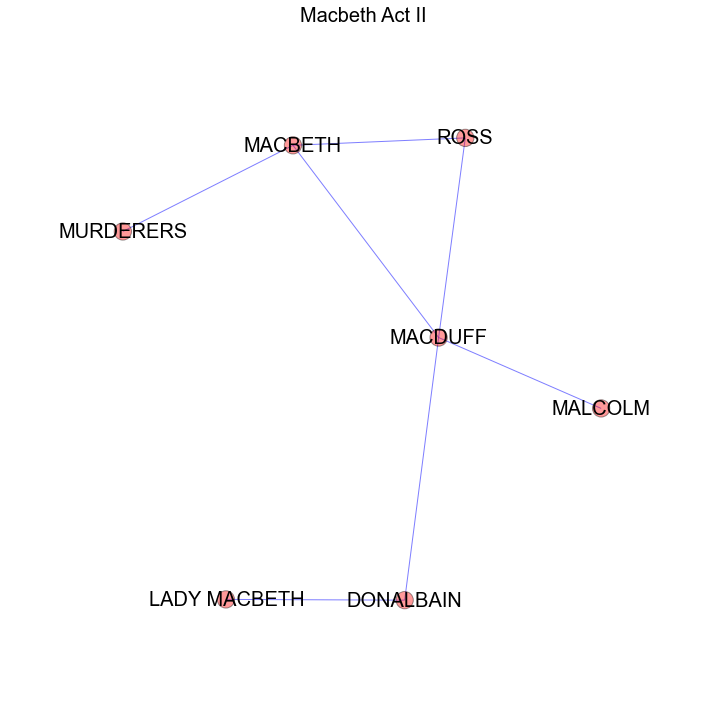

In [72]:
GI = graph_dic[ract_dic[cnum[1]]]
print "The number of actors in Macbeth's Act II is", len(GI.nodes())
print "The number of conversational relationships in Macbeth's Act II is", len(GI.edges())

GI.remove_nodes_from(nx.isolates(GI))
labels={i:v for v,i in pernode_dict.items() if i in GI.nodes()}
weights={(i[0],i[1]):i[2]['weight'] for i in GI.edges(data=True) }#if all((i[0],i[1])) in G.nodes() }
plt.figure(figsize=(12,12))
try:
    f=open('positions_of_Mc_Shake.dmp')
    pos_dict=pickle.load(f)
    pos =pos_dict[1]
except:
    
    pos=nx.spring_layout(GI,scale=50)
    pos_dict[1]=pos
# pos=nx.spring_layout(GI,scale=50)
# pos_dict[1]=pos
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(GI,pos=pos,with_labels=False,alpha=0.4)
labe=nx.draw_networkx_labels(GI,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(GI,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=0.2)
plt.title("Macbeth Act II",fontsize=20)
kk=plt.axis('off')

The number of actors in Macbeth's Act III is 14
The number of conversational relationships in Macbeth's Act III is 17


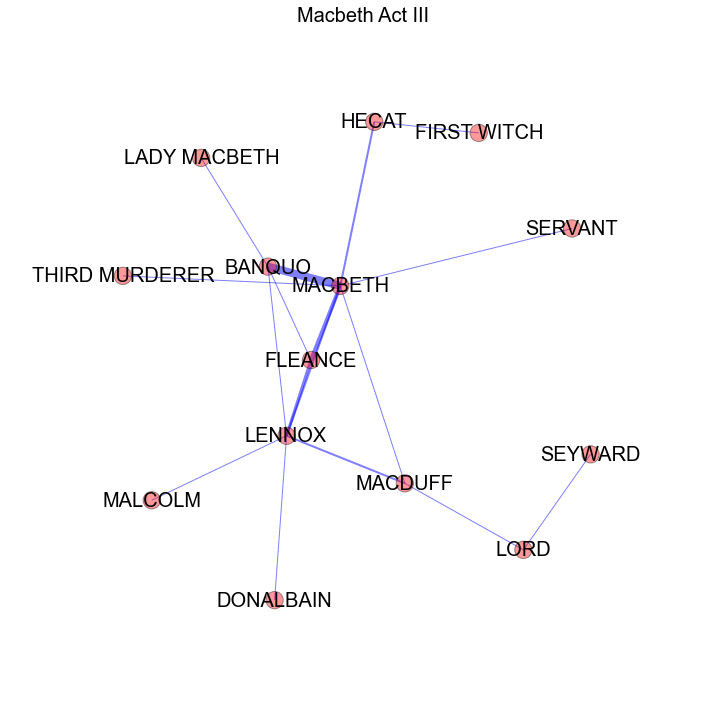

In [73]:
GI = graph_dic[ract_dic[cnum[2]]]
print "The number of actors in Macbeth's Act III is", len(GI.nodes())
print "The number of conversational relationships in Macbeth's Act III is", len(GI.edges())

GI.remove_nodes_from(nx.isolates(GI))
labels={i:v for v,i in pernode_dict.items() if i in GI.nodes()}
weights={(i[0],i[1]):i[2]['weight'] for i in GI.edges(data=True) }#if all((i[0],i[1])) in G.nodes() }
plt.figure(figsize=(12,12))
try:
    f=open('positions_of_Mc_Shake.dmp')
    pos_dict=pickle.load(f)
    pos =pos_dict[2]
except:
    
    pos=nx.spring_layout(GI,scale=50)
    pos_dict[2]=pos
# pos=nx.spring_layout(GI,scale=50)
# pos_dict[2]=pos
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(GI,pos=pos,with_labels=False,alpha=0.4)
labe=nx.draw_networkx_labels(GI,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(GI,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=0.2)
plt.title("Macbeth Act III",fontsize=20)
kk=plt.axis('off')

The number of actors in Macbeth's Act IV is 12
The number of conversational relationships in Macbeth's Act IV is 17


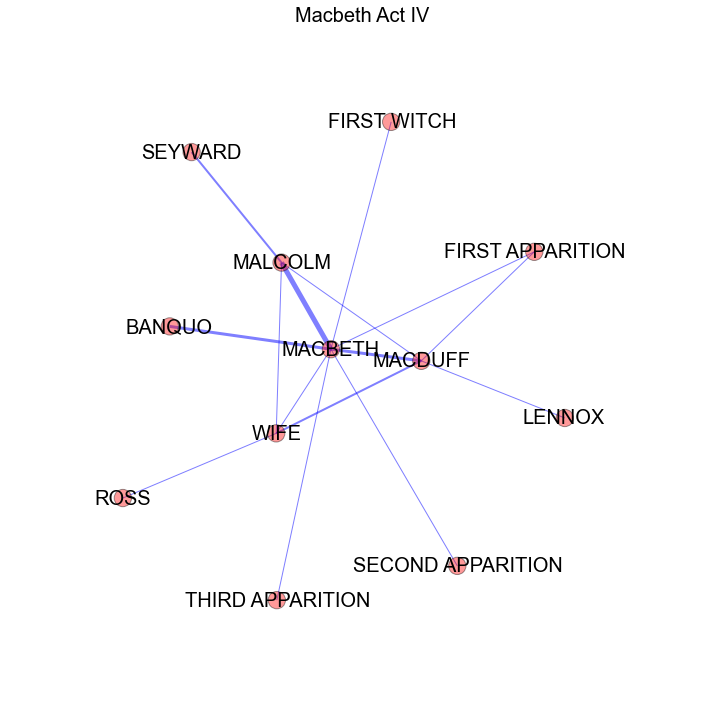

In [74]:
GI = graph_dic[ract_dic[cnum[3]]]
print "The number of actors in Macbeth's Act IV is", len(GI.nodes())
print "The number of conversational relationships in Macbeth's Act IV is", len(GI.edges())

GI.remove_nodes_from(nx.isolates(GI))
labels={i:v for v,i in pernode_dict.items() if i in GI.nodes()}
weights={(i[0],i[1]):i[2]['weight'] for i in GI.edges(data=True) }#if all((i[0],i[1])) in G.nodes() }
plt.figure(figsize=(12,12))
try:
    f=open('positions_of_Mc_Shake.dmp')
    pos_dict=pickle.load(f)
    pos =pos_dict[3]
except:
    
    pos=nx.spring_layout(GI,scale=50)
    pos_dict[3]=pos
# pos=nx.spring_layout(GI,scale=50)
# pos_dict[3]=pos
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(GI,pos=pos,with_labels=False,alpha=0.4)
labe=nx.draw_networkx_labels(GI,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(GI,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=0.2)
plt.title("Macbeth Act IV",fontsize=20)
kk=plt.axis('off')

The number of actors in Macbeth's Act V is 13
The number of conversational relationships in Macbeth's Act V is 14


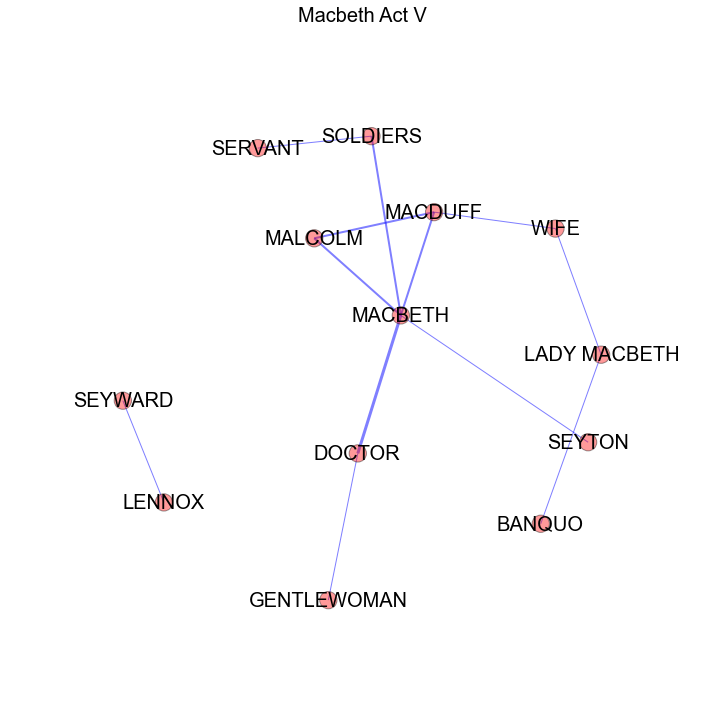

In [75]:
GI = graph_dic[ract_dic[cnum[4]]]
print "The number of actors in Macbeth's Act V is", len(GI.nodes())
print "The number of conversational relationships in Macbeth's Act V is", len(GI.edges())

GI.remove_nodes_from(nx.isolates(GI))
labels={i:v for v,i in pernode_dict.items() if i in GI.nodes()}
weights={(i[0],i[1]):i[2]['weight'] for i in GI.edges(data=True) }#if all((i[0],i[1])) in G.nodes() }
plt.figure(figsize=(12,12))
try:
    f=open('positions_of_Mc_Shake.dmp')
    pos_dict=pickle.load(f)
    pos =pos_dict[4]
except:
    
    pos=nx.spring_layout(GI,scale=50)
    pos_dict[4]=pos
# pos=nx.spring_layout(GI,scale=50)
# pos_dict[4]=pos
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(GI,pos=pos,with_labels=False,alpha=0.4)
labe=nx.draw_networkx_labels(GI,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(GI,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=0.2)
plt.title("Macbeth Act V",fontsize=20)
kk=plt.axis('off')

The number of actors in Macbeth Network (all Acts) is 27
The number of conversational relationships in Macbeth Network (all Acts) is 49


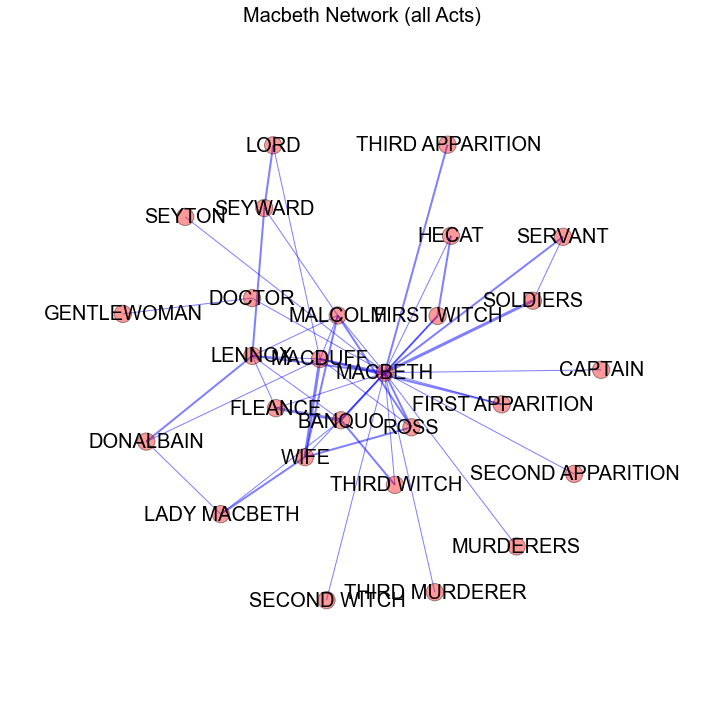

In [76]:
G=plot_total_graph_with_weights(graph_dic,nodper_dic)
weights={(nd[0],nd[1]):str(nd[2]['weight']) for nd in G.edges(data=True)}
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
print "The number of actors in Macbeth Network (all Acts) is", len(G.nodes())
print "The number of conversational relationships in Macbeth Network (all Acts) is", len(G.edges())

# print labels
plt.figure(figsize=(12,12))
# pos=nx.spring_layout(G,scale=50)
try:
    f=open('positions_of_Mc_Shake.dmp')
    pos_dict=pickle.load(f)
    pos =pos_dict[5]
except:
    
    pos=nx.spring_layout(G,scale=50)
    pos_dict[5]=pos
    
# print pos

edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Macbeth Network (all Acts)",fontsize=20)
kk=plt.axis('off')


In [77]:
# Κάνε ένα ένα τα ποσ μέχρι εδώ και όταν τελειώσεις τρέξε και αυτό το κελί. Αν θες να το 
# ξαναλάξεις διέγραψε το 'positions_of_JC_Shake.dmp'

f=open('positions_of_Mc_Shake.dmp','w')
pickle.dump(pos_dict,f)
f.close()
# pos_dict[5]=pos

f=open('positions_of_Mc_Shake.dmp')
pos_dict=pickle.load(f)
f.close()

## Macbeth Network Centralities

### Degree Centrality

MACBETH has degree centrality 0.857142857143
BANQUO has degree centrality 0.428571428571
FIRST WITCH has degree centrality 0.285714285714
MALCOLM has degree centrality 0.142857142857


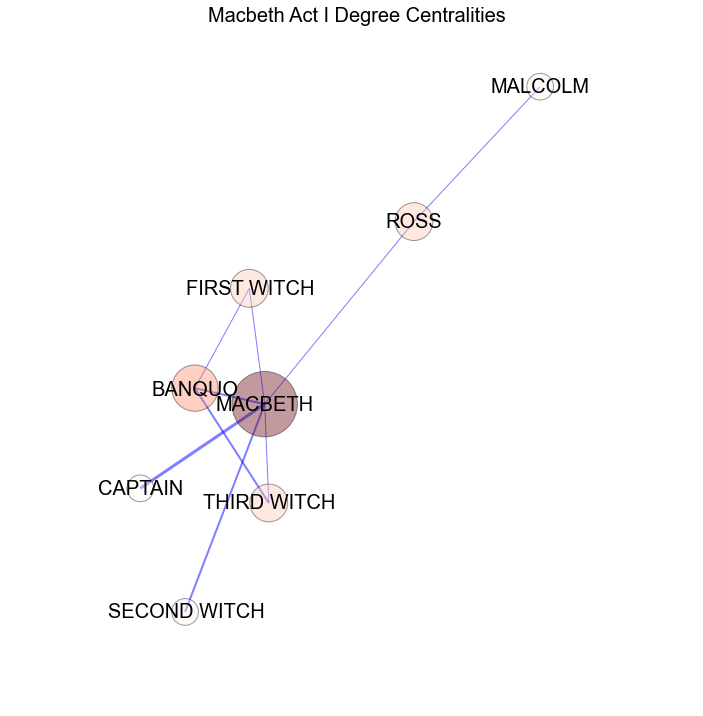

In [78]:
G = graph_dic[ract_dic[cnum[0]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
dc = nx.degree_centrality(G)
dcs={}
for k,v in dc.items():
    dcs[v]=k
for k in sorted(dcs,reverse=True):
    print labels[dcs[k]], 'has degree centrality', k
pos=pos_dict[0]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=dc.keys(),
                       node_size = [d*5000 for d in dc.values()],node_color=dc.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Macbeth Act I Degree Centralities",fontsize=20)
kk=plt.axis('off')

MACBETH has degree centrality 0.833333333333
MACDUFF has degree centrality 0.666666666667
ROSS has degree centrality 0.333333333333
LADY MACBETH has degree centrality 0.166666666667


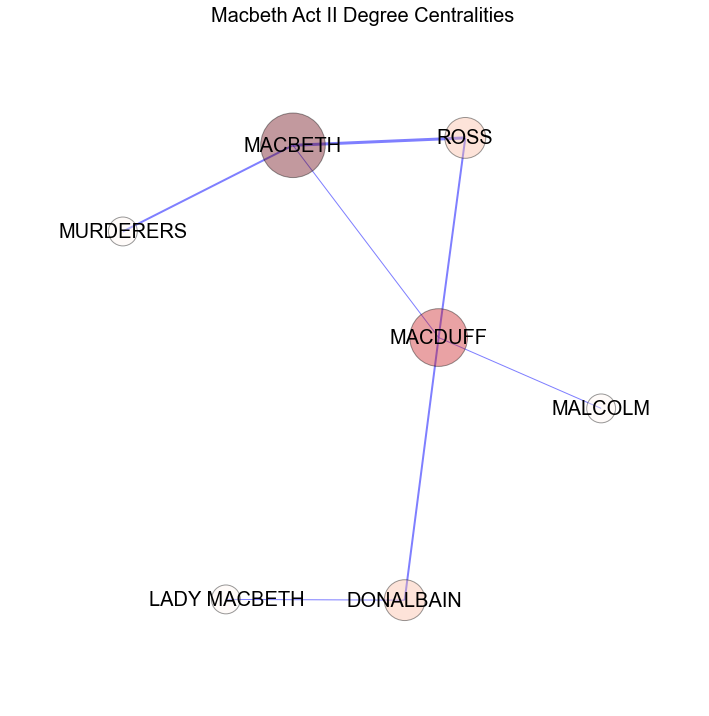

In [79]:
G = graph_dic[ract_dic[cnum[1]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
# dc = nx.degree_centrality(G)
# for k,v in dc.items():
#     print labels[k], 'has degree centrality', v
dc = nx.degree_centrality(G)
dcs={}
for k,v in dc.items():
    dcs[v]=k
for k in sorted(dcs,reverse=True):
    print labels[dcs[k]], 'has degree centrality', k
pos=pos_dict[1]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=dc.keys(),
                       node_size = [d*5000 for d in dc.values()],node_color=dc.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Macbeth Act II Degree Centralities",fontsize=20)
kk=plt.axis('off')

MACBETH has degree centrality 0.538461538462
LENNOX has degree centrality 0.461538461538
BANQUO has degree centrality 0.307692307692
FLEANCE has degree centrality 0.230769230769
LORD has degree centrality 0.153846153846
SEYWARD has degree centrality 0.0769230769231


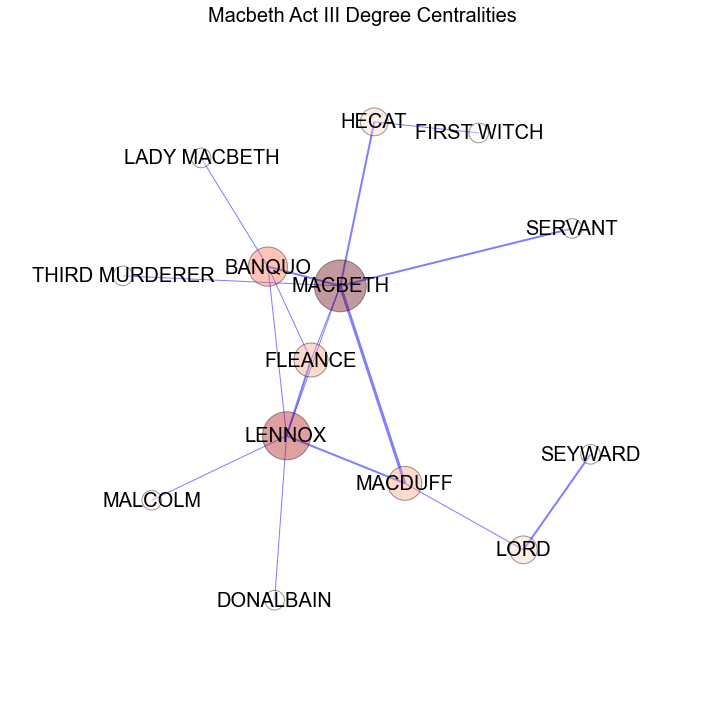

In [80]:
G = graph_dic[ract_dic[cnum[2]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
dc = nx.degree_centrality(G)
dcs={}
for k,v in dc.items():
    dcs[v]=k
for k in sorted(dcs,reverse=True):
    print labels[dcs[k]], 'has degree centrality', k
pos=pos_dict[2]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=dc.keys(),
                       node_size = [d*5000 for d in dc.values()],node_color=dc.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Macbeth Act III Degree Centralities",fontsize=20)
kk=plt.axis('off')

MACBETH has degree centrality 0.909090909091
MACDUFF has degree centrality 0.636363636364
WIFE has degree centrality 0.363636363636
FIRST APPARITION has degree centrality 0.181818181818
SEYWARD has degree centrality 0.0909090909091


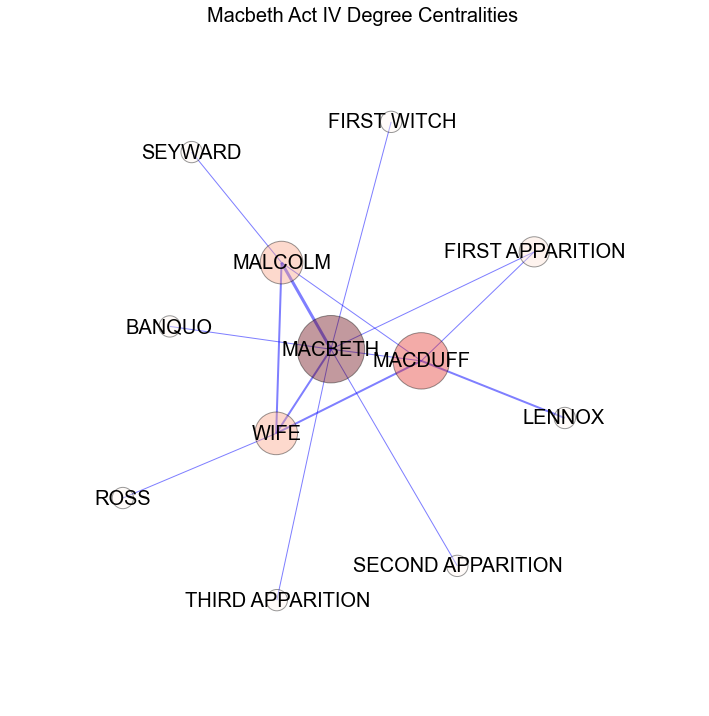

In [81]:
G = graph_dic[ract_dic[cnum[3]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
dc = nx.degree_centrality(G)
dcs={}
for k,v in dc.items():
    dcs[v]=k
for k in sorted(dcs,reverse=True):
    print labels[dcs[k]], 'has degree centrality', k
pos=pos_dict[3]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=dc.keys(),
                       node_size = [d*5000 for d in dc.values()],node_color=dc.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Macbeth Act IV Degree Centralities",fontsize=20)
kk=plt.axis('off')

MACBETH has degree centrality 0.583333333333
MACDUFF has degree centrality 0.416666666667
WIFE has degree centrality 0.166666666667
SEYTON has degree centrality 0.0833333333333


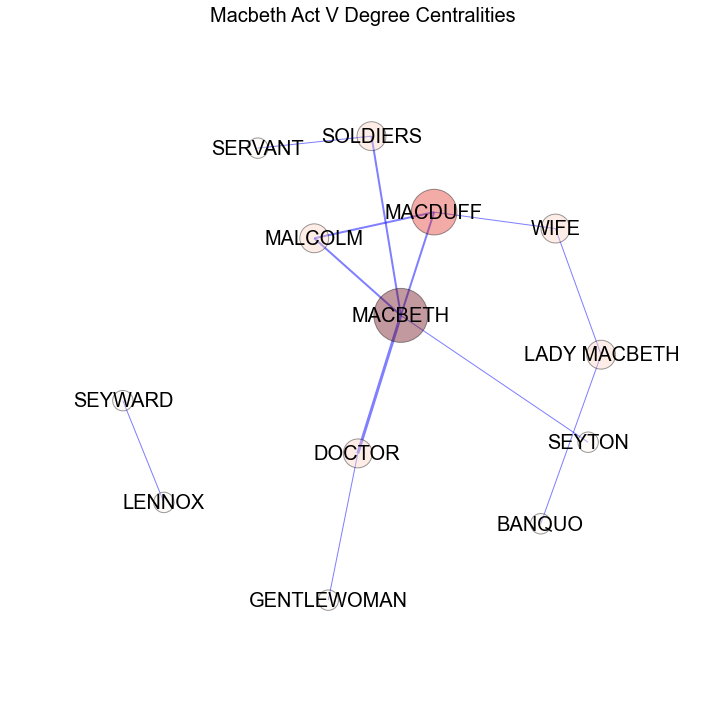

In [82]:
G = graph_dic[ract_dic[cnum[4]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
dc = nx.degree_centrality(G)
dcs={}
for k,v in dc.items():
    dcs[v]=k
for k in sorted(dcs,reverse=True):
    print labels[dcs[k]], 'has degree centrality', k
pos=pos_dict[4]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=dc.keys(),
                       node_size = [d*5000 for d in dc.values()],node_color=dc.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Macbeth Act V Degree Centralities",fontsize=20)
kk=plt.axis('off')

MACBETH has degree centrality 0.884615384615
MACDUFF has degree centrality 0.384615384615
LENNOX has degree centrality 0.269230769231
BANQUO has degree centrality 0.230769230769
WIFE has degree centrality 0.192307692308
ROSS has degree centrality 0.153846153846
FLEANCE has degree centrality 0.115384615385
FIRST APPARITION has degree centrality 0.0769230769231
MURDERERS has degree centrality 0.0384615384615


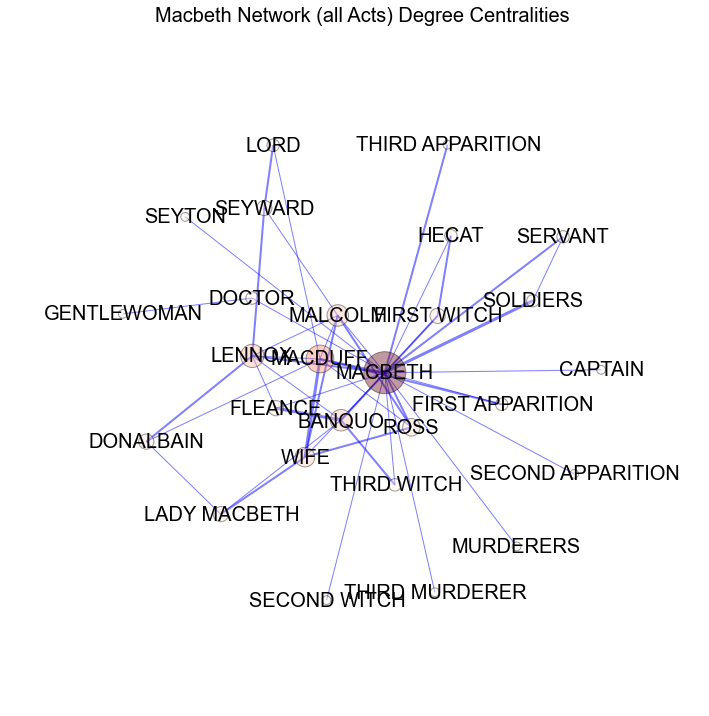

In [83]:
G=plot_total_graph_with_weights(graph_dic,nodper_dic)
weights={(nd[0],nd[1]):str(nd[2]['weight']) for nd in G.edges(data=True)}
# G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
dc = nx.degree_centrality(G)
dcs={}
for k,v in dc.items():
    dcs[v]=k
for k in sorted(dcs,reverse=True):
    print labels[dcs[k]], 'has degree centrality', k
pos=pos_dict[5]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=dc.keys(),
                       node_size = [d*2000 for d in dc.values()],node_color=dc.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Macbeth Network (all Acts) Degree Centralities",fontsize=20)
kk=plt.axis('off')

### Closeness Centrality

MACBETH has closeness centrality 0.875
BANQUO has closeness centrality 0.583333333333
FIRST WITCH has closeness centrality 0.538461538462
CAPTAIN has closeness centrality 0.5
MALCOLM has closeness centrality 0.388888888889


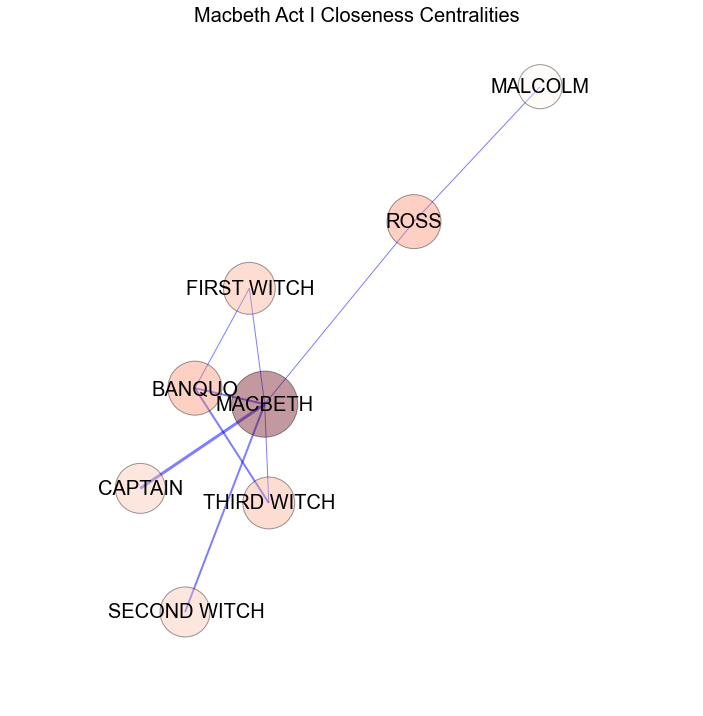

In [84]:
G = graph_dic[ract_dic[cnum[0]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
cl = nx.closeness_centrality(G)
cls={}
for k,v in cl.items():
    cls[v]=k
for k in sorted(cls,reverse=True):
    print labels[cls[k]], 'has closeness centrality', k
pos=pos_dict[0]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=cl.keys(),
                       node_size = [d*5000 for d in cl.values()],node_color=cl.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Macbeth Act I Closeness Centralities",fontsize=20)
kk=plt.axis('off')

MACDUFF has closeness centrality 0.75
MACBETH has closeness centrality 0.6
ROSS has closeness centrality 0.545454545455
MALCOLM has closeness centrality 0.461538461538
MURDERERS has closeness centrality 0.4
LADY MACBETH has closeness centrality 0.375


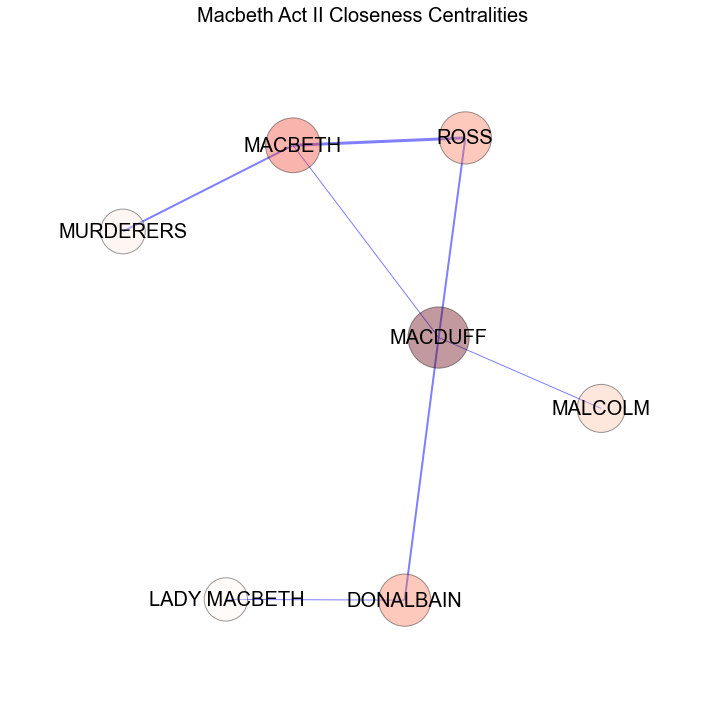

In [85]:
G = graph_dic[ract_dic[cnum[1]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
cl = nx.closeness_centrality(G)
cls={}
for k,v in cl.items():
    cls[v]=k
for k in sorted(cls,reverse=True):
    print labels[cls[k]], 'has closeness centrality', k
pos=pos_dict[1]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=cl.keys(),
                       node_size = [d*5000 for d in cl.values()],node_color=cl.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Macbeth Act II Closeness Centralities",fontsize=20)
kk=plt.axis('off')

MACBETH has closeness centrality 0.65
LENNOX has closeness centrality 0.590909090909
MACDUFF has closeness centrality 0.52
BANQUO has closeness centrality 0.5
FLEANCE has closeness centrality 0.481481481481
HECAT has closeness centrality 0.433333333333
THIRD MURDERER has closeness centrality 0.40625
MALCOLM has closeness centrality 0.382352941176
LORD has closeness centrality 0.371428571429
LADY MACBETH has closeness centrality 0.342105263158
FIRST WITCH has closeness centrality 0.309523809524
SEYWARD has closeness centrality 0.276595744681


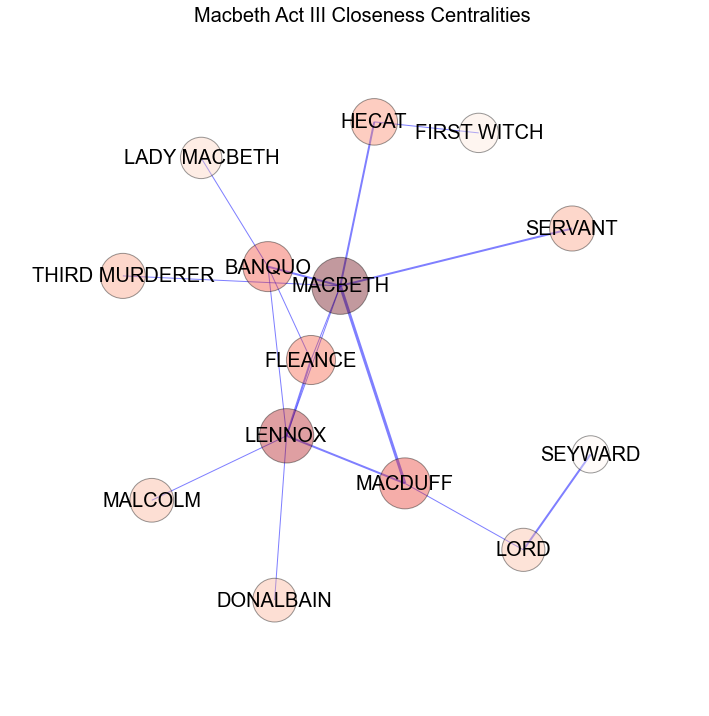

In [86]:
G = graph_dic[ract_dic[cnum[2]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
cl = nx.closeness_centrality(G)
cls={}
for k,v in cl.items():
    cls[v]=k
for k in sorted(cls,reverse=True):
    print labels[cls[k]], 'has closeness centrality', k
pos=pos_dict[2]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=cl.keys(),
                       node_size = [d*5000 for d in cl.values()],node_color=cl.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Macbeth Act III Closeness Centralities",fontsize=20)
kk=plt.axis('off')

MACBETH has closeness centrality 0.785714285714
THIRD APPARITION has closeness centrality 0.458333333333
ROSS has closeness centrality 0.392857142857
SECOND APPARITION has closeness centrality 0.458333333333
LENNOX has closeness centrality 0.407407407407
MACDUFF has closeness centrality 0.647058823529
MALCOLM has closeness centrality 0.611111111111
BANQUO has closeness centrality 0.458333333333
FIRST WITCH has closeness centrality 0.458333333333
FIRST APPARITION has closeness centrality 0.5
SEYWARD has closeness centrality 0.392857142857
WIFE has closeness centrality 0.611111111111


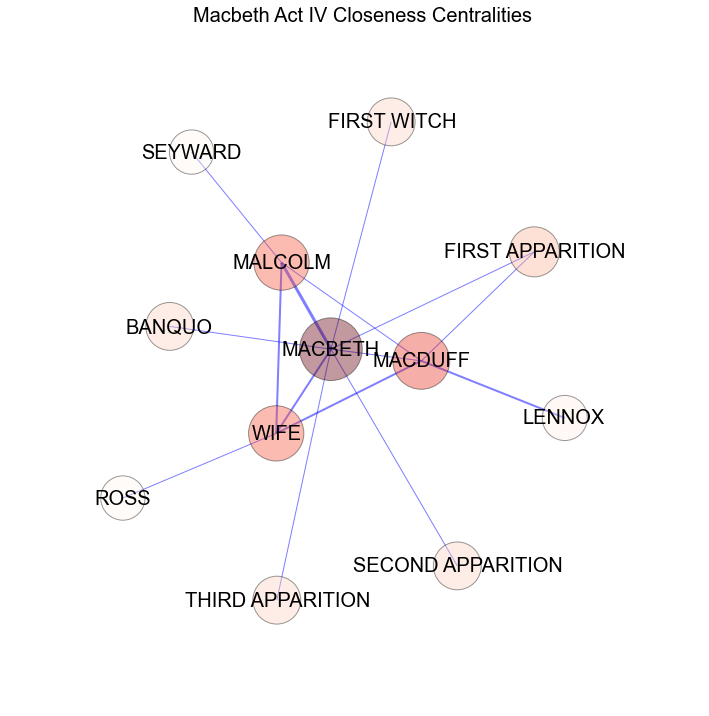

In [87]:
G = graph_dic[ract_dic[cnum[3]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
cl = nx.closeness_centrality(G)
for k,v in cl.items():
    print labels[k], 'has closeness centrality', v
# pos=nx.spring_layout(G,scale=50)
pos=pos_dict[3]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=cl.keys(),
                       node_size = [d*5000 for d in cl.values()],node_color=cl.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Macbeth Act IV Closeness Centralities",fontsize=20)
kk=plt.axis('off')

MACBETH has closeness centrality 0.462962962963
MACDUFF has closeness centrality 0.416666666667
MALCOLM has closeness centrality 0.36231884058
WIFE has closeness centrality 0.333333333333
SEYTON has closeness centrality 0.308641975309
LADY MACBETH has closeness centrality 0.260416666667
GENTLEWOMAN has closeness centrality 0.245098039216
BANQUO has closeness centrality 0.20325203252
SEYWARD has closeness centrality 0.0833333333333


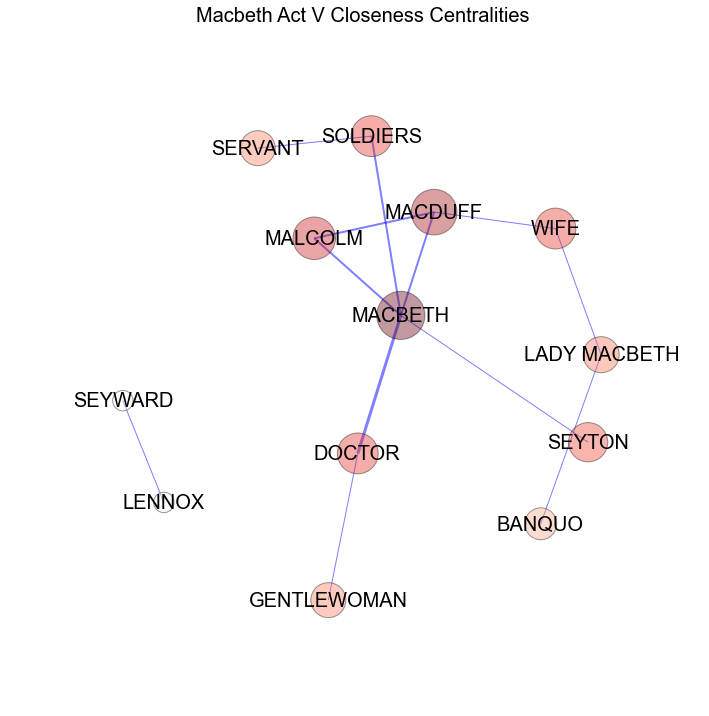

In [88]:
G = graph_dic[ract_dic[cnum[4]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
cl = nx.closeness_centrality(G)
cls={}
for k,v in cl.items():
    cls[v]=k
for k in sorted(cls,reverse=True):
    print labels[cls[k]], 'has closeness centrality', k
pos=pos_dict[4]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=cl.keys(),
                       node_size = [d*5000 for d in cl.values()],node_color=cl.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Macbeth Act V Closeness Centralities",fontsize=20)
kk=plt.axis('off')

MACBETH has closeness centrality 0.838709677419
MACDUFF has closeness centrality 0.577777777778
LENNOX has closeness centrality 0.565217391304
MALCOLM has closeness centrality 0.553191489362
WIFE has closeness centrality 0.541666666667
ROSS has closeness centrality 0.530612244898
FLEANCE has closeness centrality 0.509803921569
FIRST APPARITION has closeness centrality 0.490566037736
DOCTOR has closeness centrality 0.481481481481
HECAT has closeness centrality 0.472727272727
MURDERERS has closeness centrality 0.464285714286
DONALBAIN has closeness centrality 0.40625
LADY MACBETH has closeness centrality 0.4
SEYWARD has closeness centrality 0.393939393939
LORD has closeness centrality 0.382352941176
GENTLEWOMAN has closeness centrality 0.329113924051


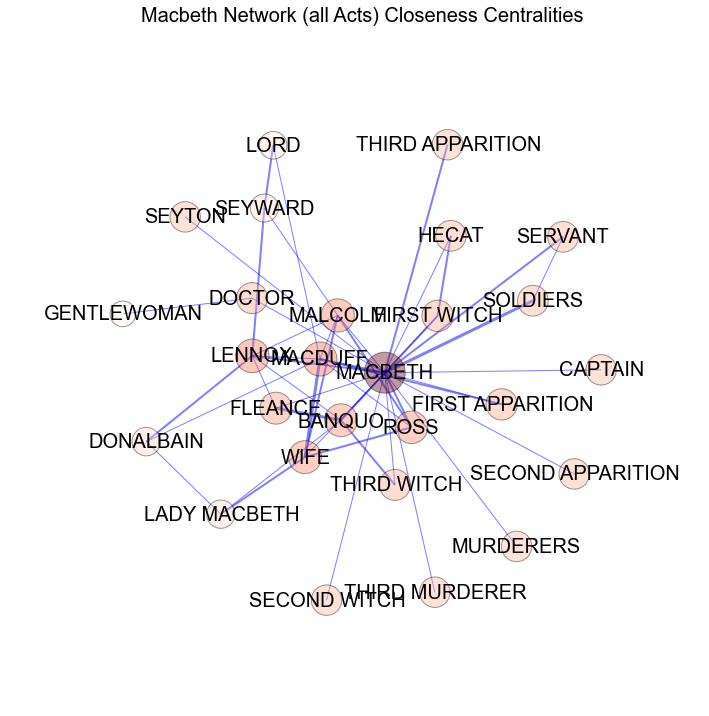

In [89]:
G=plot_total_graph_with_weights(graph_dic,nodper_dic)
weights={(nd[0],nd[1]):str(nd[2]['weight']) for nd in G.edges(data=True)}
# G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
cl = nx.closeness_centrality(G)
cls={}
for k,v in cl.items():
    cls[v]=k
for k in sorted(cls,reverse=True):
    print labels[cls[k]], 'has closeness centrality', k
pos=pos_dict[5]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=cl.keys(),
                       node_size = [d*2000 for d in cl.values()],node_color=cl.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Macbeth Network (all Acts) Closeness Centralities",fontsize=20)
kk=plt.axis('off')

### Betweenness Centrality

MACBETH has betweenness centrality 0.833333333333
ROSS has betweenness centrality 0.285714285714
BANQUO has betweenness centrality 0.0238095238095
FIRST WITCH has betweenness centrality 0.0


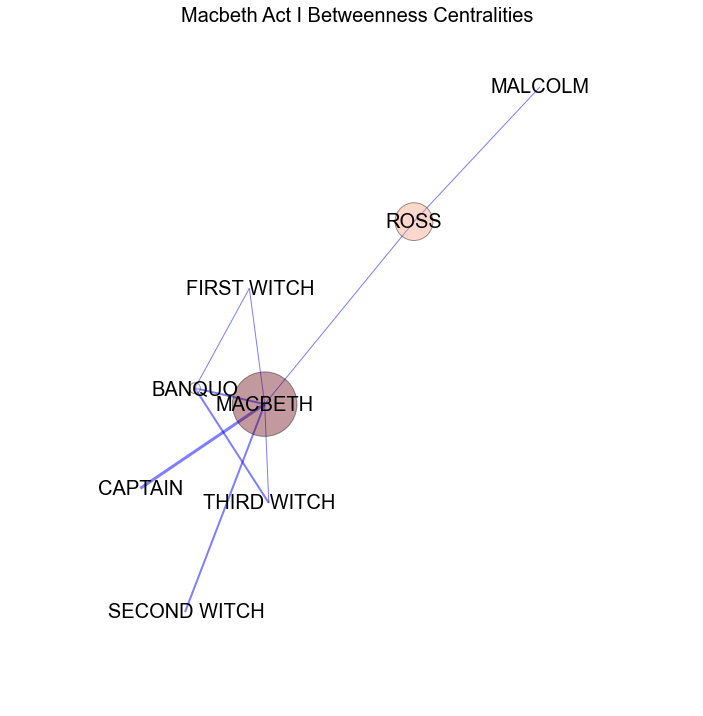

In [90]:
G = graph_dic[ract_dic[cnum[0]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
bc = nx.betweenness_centrality(G)
bcs={}
for k,v in bc.items():
    bcs[v]=k
for k in sorted(bcs,reverse=True):
    print labels[bcs[k]], 'has betweenness centrality', k
pos=pos_dict[0]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=bc.keys(),
                       node_size = [d*5000 for d in bc.values()],node_color=bc.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Macbeth Act I Betweenness Centralities",fontsize=20)
kk=plt.axis('off')

MACDUFF has betweenness centrality 0.733333333333
MACBETH has betweenness centrality 0.333333333333
LADY MACBETH has betweenness centrality 0.0


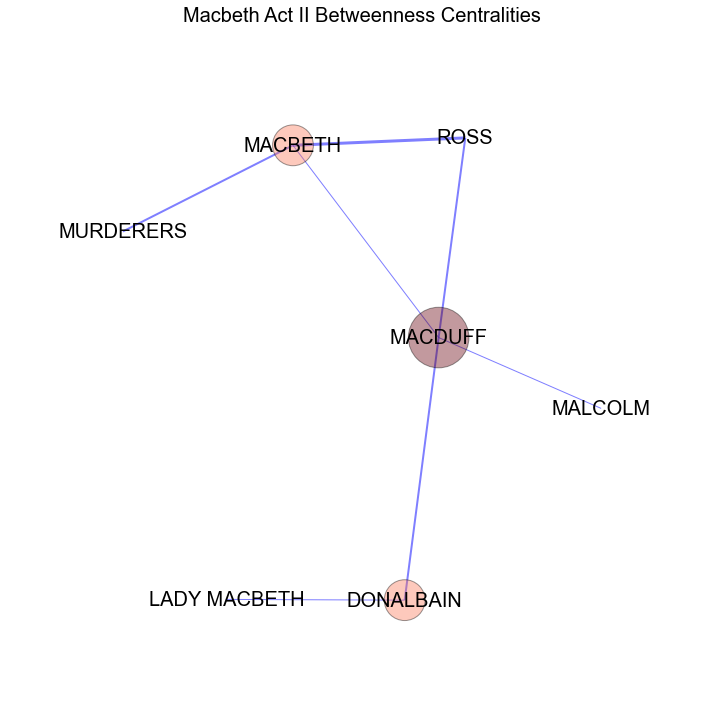

In [91]:
G = graph_dic[ract_dic[cnum[1]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
bc = nx.betweenness_centrality(G)
bcs={}
for k,v in bc.items():
    bcs[v]=k
for k in sorted(bcs,reverse=True):
    print labels[bcs[k]], 'has betweenness centrality', k
pos=pos_dict[1]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=bc.keys(),
                       node_size = [d*5000 for d in bc.values()],node_color=bc.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Macbeth Act II Betweenness Centralities",fontsize=20)
kk=plt.axis('off')

MACBETH has betweenness centrality 0.583333333333
LENNOX has betweenness centrality 0.352564102564
MACDUFF has betweenness centrality 0.282051282051
LORD has betweenness centrality 0.153846153846
FLEANCE has betweenness centrality 0.0


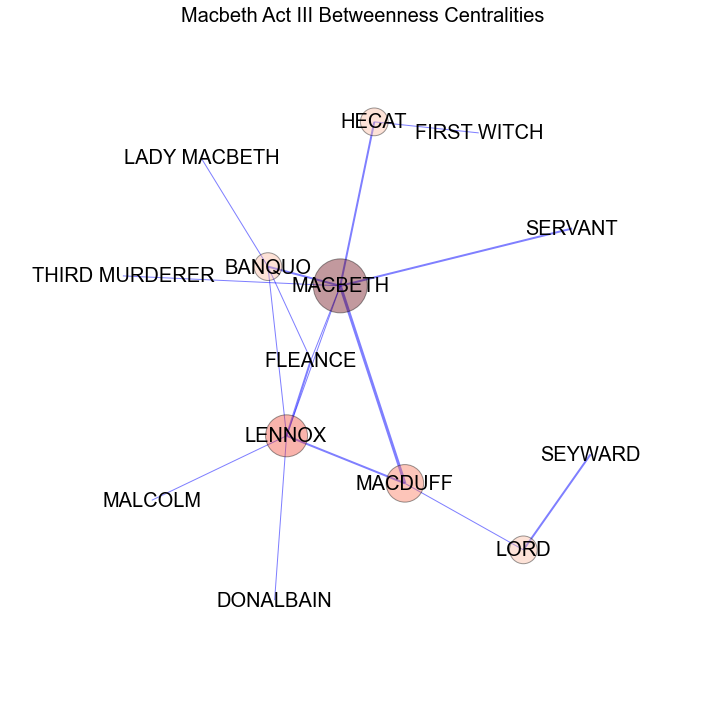

In [92]:
G = graph_dic[ract_dic[cnum[2]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
bc = nx.betweenness_centrality(G)
bcs={}
for k,v in bc.items():
    bcs[v]=k
for k in sorted(bcs,reverse=True):
    print labels[bcs[k]], 'has betweenness centrality', k
pos=pos_dict[2]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=bc.keys(),
                       node_size = [d*5000 for d in bc.values()],node_color=bc.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Macbeth Act III Betweenness Centralities",fontsize=20)
kk=plt.axis('off')

MACBETH has betweenness centrality 0.654545454545
MACDUFF has betweenness centrality 0.218181818182
WIFE has betweenness centrality 0.181818181818
SEYWARD has betweenness centrality 0.0


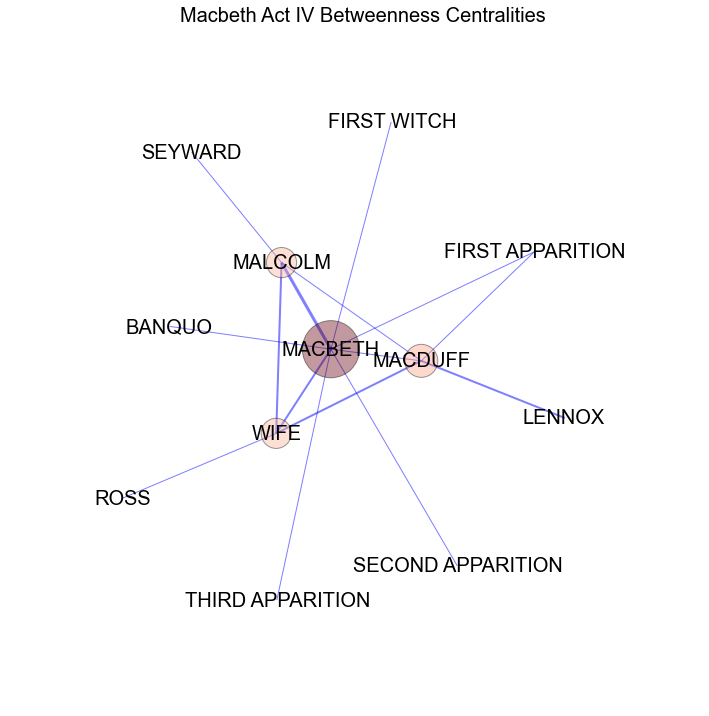

In [93]:
G = graph_dic[ract_dic[cnum[3]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
bc = nx.betweenness_centrality(G)
bcs={}
for k,v in bc.items():
    bcs[v]=k
for k in sorted(bcs,reverse=True):
    print labels[bcs[k]], 'has betweenness centrality', k
pos=pos_dict[3]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=bc.keys(),
                       node_size = [d*5000 for d in bc.values()],node_color=bc.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Macbeth Act IV Betweenness Centralities",fontsize=20)
kk=plt.axis('off')

MACBETH has betweenness centrality 0.5
MACDUFF has betweenness centrality 0.318181818182
WIFE has betweenness centrality 0.242424242424
LADY MACBETH has betweenness centrality 0.136363636364
SEYTON has betweenness centrality 0.0


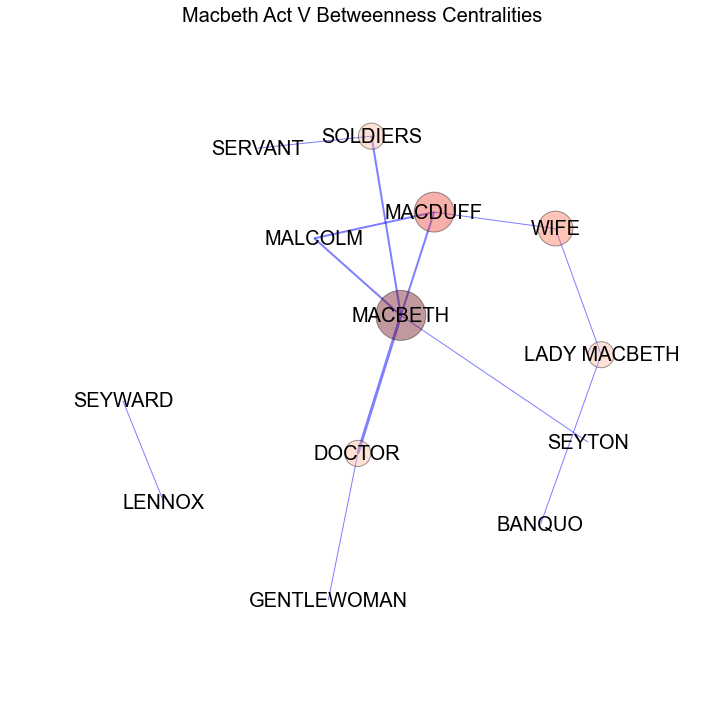

In [94]:
G = graph_dic[ract_dic[cnum[4]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
bc = nx.betweenness_centrality(G)
bcs={}
for k,v in bc.items():
    bcs[v]=k
for k in sorted(bcs,reverse=True):
    print labels[bcs[k]], 'has betweenness centrality', k
pos=pos_dict[4]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=bc.keys(),
                       node_size = [d*5000 for d in bc.values()],node_color=bc.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Macbeth Act V Betweenness Centralities",fontsize=20)
kk=plt.axis('off')

MACBETH has betweenness centrality 0.796102564103
MACDUFF has betweenness centrality 0.111076923077
LENNOX has betweenness centrality 0.0771282051282
DOCTOR has betweenness centrality 0.0769230769231
BANQUO has betweenness centrality 0.0458974358974
MALCOLM has betweenness centrality 0.0335384615385
WIFE has betweenness centrality 0.0312820512821
DONALBAIN has betweenness centrality 0.00641025641026
LADY MACBETH has betweenness centrality 0.00615384615385
SEYWARD has betweenness centrality 0.00512820512821
FIRST WITCH has betweenness centrality 0.0025641025641
LORD has betweenness centrality 0.00164102564103
ROSS has betweenness centrality 0.0


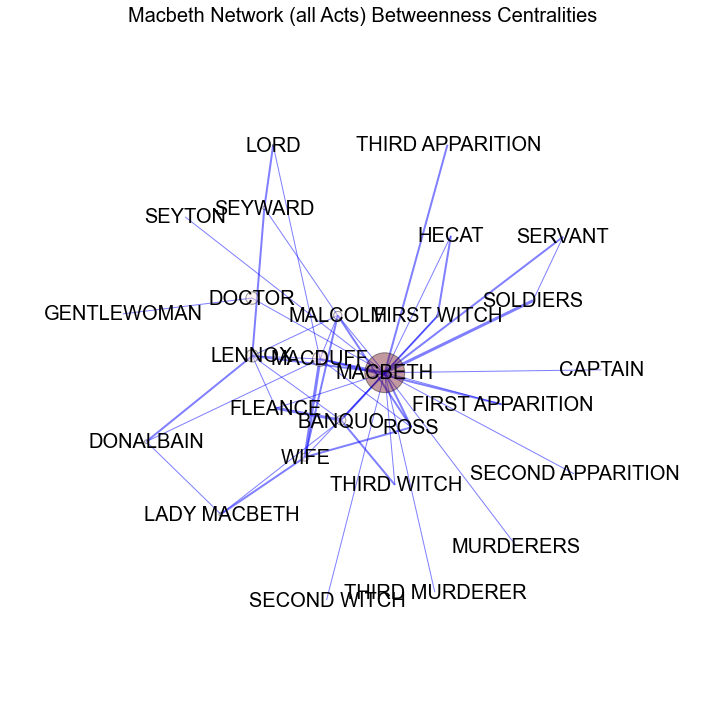

In [95]:
G=plot_total_graph_with_weights(graph_dic,nodper_dic)
weights={(nd[0],nd[1]):str(nd[2]['weight']) for nd in G.edges(data=True)}
# G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
bc = nx.betweenness_centrality(G)
bcs={}
for k,v in bc.items():
    bcs[v]=k
for k in sorted(bcs,reverse=True):
    print labels[bcs[k]], 'has betweenness centrality', k
pos=pos_dict[5]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=bc.keys(),
                       node_size = [d*2000 for d in bc.values()],node_color=bc.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Macbeth Network (all Acts) Betweenness Centralities",fontsize=20)
kk=plt.axis('off')

### Eigenvector Centrality

MACBETH has eigenvector centrality 0.675115139484
THIRD WITCH has eigenvector centrality 0.516177206742
FIRST WITCH has eigenvector centrality 0.399091893236
BANQUO has eigenvector centrality 0.275821738707
ROSS has eigenvector centrality 0.120716244091
CAPTAIN has eigenvector centrality 0.117085313506
MALCOLM has eigenvector centrality 0.020935998284


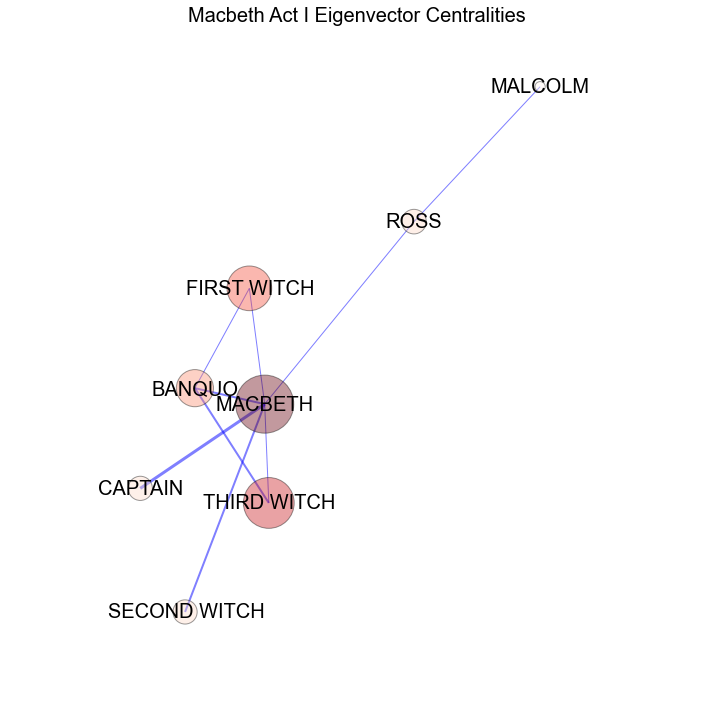

In [96]:
G = graph_dic[ract_dic[cnum[0]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
ec = nx.eigenvector_centrality(G,max_iter=1000)
ecs={}
for k,v in ec.items():
    ecs[v]=k
for k in sorted(ecs,reverse=True):
    print labels[ecs[k]], 'has eigenvector centrality', k
pos=pos_dict[0]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=ec.keys(),
                       node_size = [d*5000 for d in ec.values()],node_color=ec.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Macbeth Act I Eigenvector Centralities",fontsize=20)
kk=plt.axis('off')

MACBETH has eigenvector centrality 0.77359897513
MACDUFF has eigenvector centrality 0.423083296635
ROSS has eigenvector centrality 0.360972222709
MURDERERS has eigenvector centrality 0.233351958095
DONALBAIN has eigenvector centrality 0.140394605522
MALCOLM has eigenvector centrality 0.127620264614
LADY MACBETH has eigenvector centrality 0.0423496242203


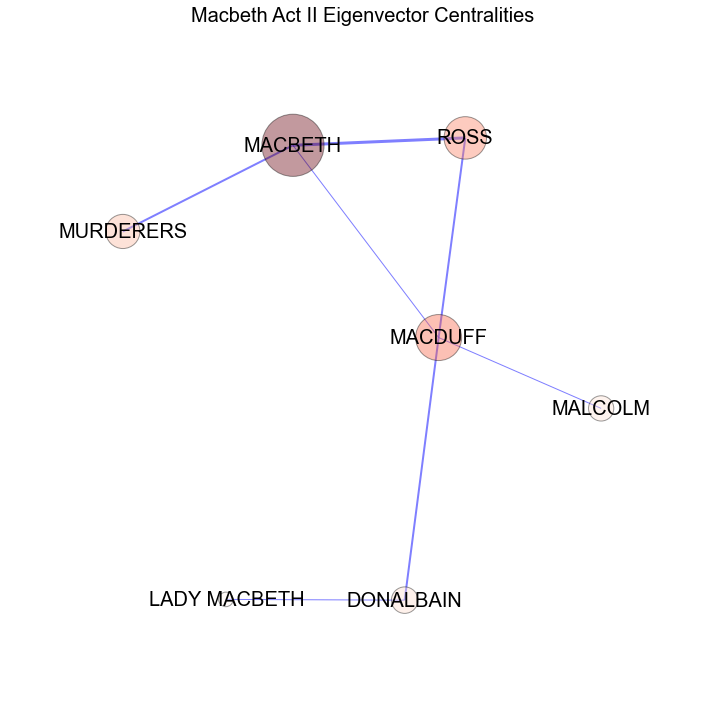

In [97]:
G = graph_dic[ract_dic[cnum[1]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
ec = nx.eigenvector_centrality(G,max_iter=1000)
ecs={}
for k,v in ec.items():
    ecs[v]=k
for k in sorted(ecs,reverse=True):
    print labels[ecs[k]], 'has eigenvector centrality', k
pos=pos_dict[1]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=ec.keys(),
                       node_size = [d*5000 for d in ec.values()],node_color=ec.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Macbeth Act II Eigenvector Centralities",fontsize=20)
kk=plt.axis('off')

MACBETH has eigenvector centrality 0.649805800355
BANQUO has eigenvector centrality 0.550447003171
FLEANCE has eigenvector centrality 0.376943478754
LENNOX has eigenvector centrality 0.303778269155
HECAT has eigenvector centrality 0.121678191116
MACDUFF has eigenvector centrality 0.117731812064
THIRD MURDERER has eigenvector centrality 0.0603149274844
LADY MACBETH has eigenvector centrality 0.0510931690715
MALCOLM has eigenvector centrality 0.0281968665817
FIRST WITCH has eigenvector centrality 0.0112943340532
LORD has eigenvector centrality 0.011022953444
SEYWARD has eigenvector centrality 0.00102315141637


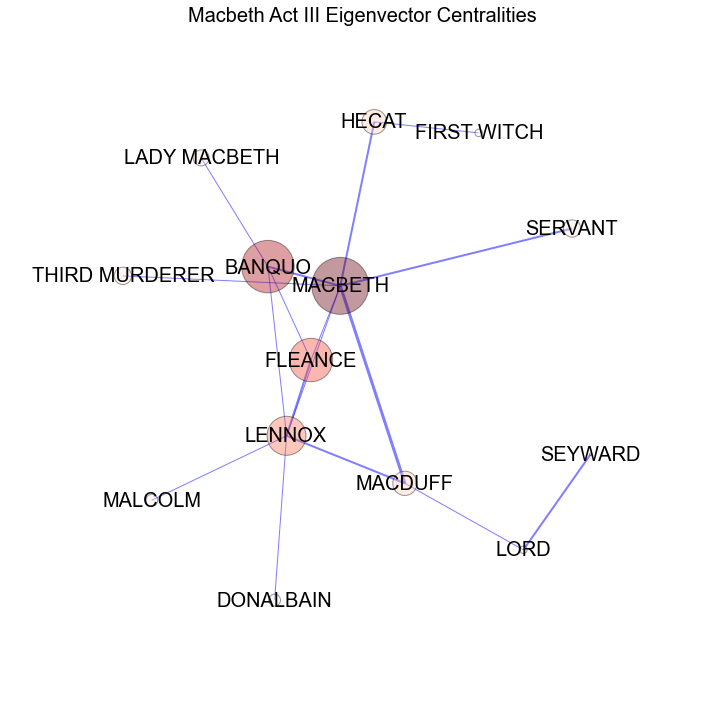

In [98]:
G = graph_dic[ract_dic[cnum[2]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
ec = nx.eigenvector_centrality(G,max_iter=1000)
ecs={}
for k,v in ec.items():
    ecs[v]=k
for k in sorted(ecs,reverse=True):
    print labels[ecs[k]], 'has eigenvector centrality', k
pos=pos_dict[2]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=ec.keys(),
                       node_size = [d*5000 for d in ec.values()],node_color=ec.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Macbeth Act III Eigenvector Centralities",fontsize=20)
kk=plt.axis('off')

MACBETH has eigenvector centrality 0.658531989788
MALCOLM has eigenvector centrality 0.488234650473
MACDUFF has eigenvector centrality 0.412112582566
WIFE has eigenvector centrality 0.234111784739
BANQUO has eigenvector centrality 0.231437233795
FIRST APPARITION has eigenvector centrality 0.12542420946
SEYWARD has eigenvector centrality 0.114392425036
SECOND APPARITION has eigenvector centrality 0.0771457445983
LENNOX has eigenvector centrality 0.0482784648619
ROSS has eigenvector centrality 0.0274258223457


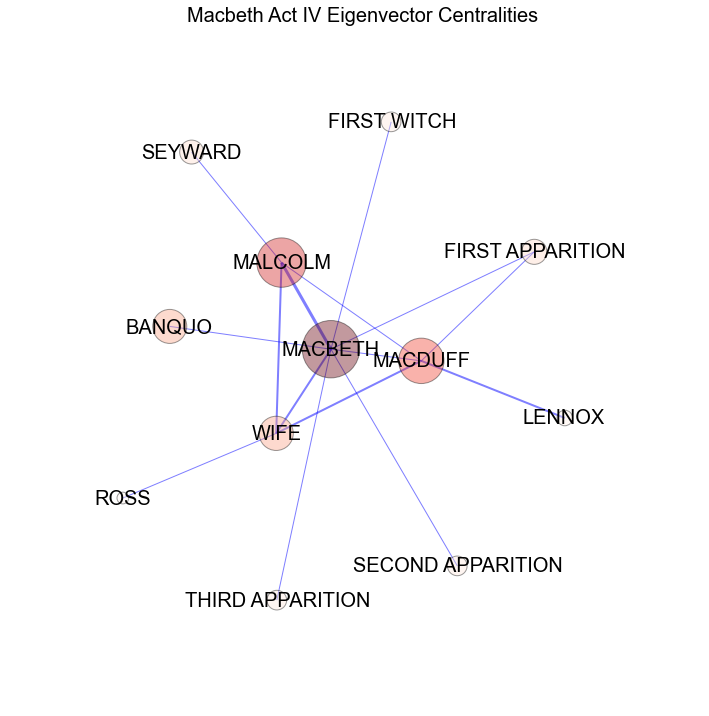

In [99]:
G = graph_dic[ract_dic[cnum[3]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
ec = nx.eigenvector_centrality(G,max_iter=1000)
ecs={}
for k,v in ec.items():
    ecs[v]=k
for k in sorted(ecs,reverse=True):
    print labels[ecs[k]], 'has eigenvector centrality', k
pos=pos_dict[3]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=ec.keys(),
                       node_size = [d*5000 for d in ec.values()],node_color=ec.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Macbeth Act IV Eigenvector Centralities",fontsize=20)
kk=plt.axis('off')

MACBETH has eigenvector centrality 0.716427549078
MACDUFF has eigenvector centrality 0.410101131746
MALCOLM has eigenvector centrality 0.353274956602
DOCTOR has eigenvector centrality 0.3454969029
SOLDIERS has eigenvector centrality 0.2303312686
SEYTON has eigenvector centrality 0.112334220877
WIFE has eigenvector centrality 0.0659659597094
GENTLEWOMAN has eigenvector centrality 0.0541736669449
SERVANT has eigenvector centrality 0.0361157779633
LADY MACBETH has eigenvector centrality 0.0106040221223
BANQUO has eigenvector centrality 0.00166270228565
LENNOX has eigenvector centrality 5.4150588089e-18


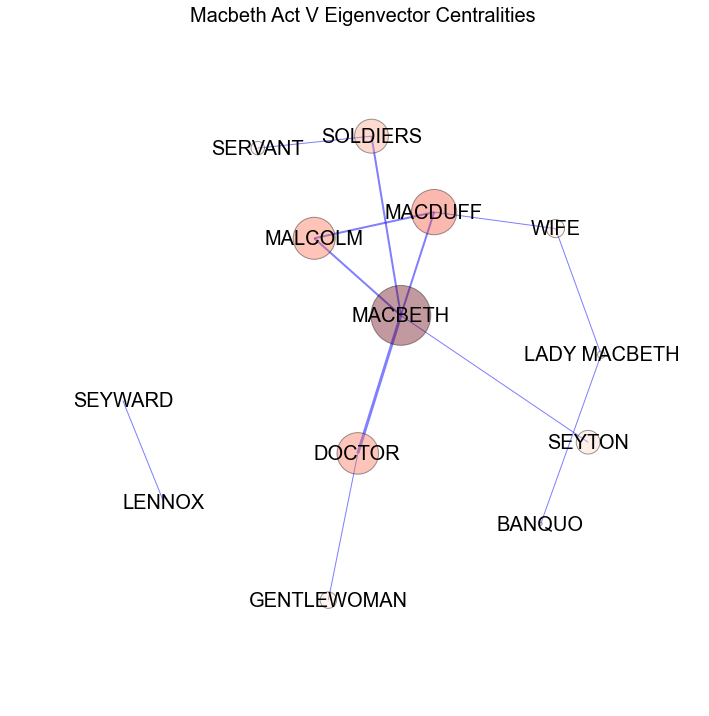

In [100]:
G = graph_dic[ract_dic[cnum[4]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
ec = nx.eigenvector_centrality(G,max_iter=1000)
ecs={}
for k,v in ec.items():
    ecs[v]=k
for k in sorted(ecs,reverse=True):
    print labels[ecs[k]], 'has eigenvector centrality', k
pos=pos_dict[4]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=ec.keys(),
                       node_size = [d*5000 for d in ec.values()],node_color=ec.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Macbeth Act V Eigenvector Centralities",fontsize=20)
kk=plt.axis('off')

MACBETH has eigenvector centrality 0.796102564103
MACDUFF has eigenvector centrality 0.111076923077
LENNOX has eigenvector centrality 0.0771282051282
DOCTOR has eigenvector centrality 0.0769230769231
BANQUO has eigenvector centrality 0.0458974358974
MALCOLM has eigenvector centrality 0.0335384615385
WIFE has eigenvector centrality 0.0312820512821
DONALBAIN has eigenvector centrality 0.00641025641026
LADY MACBETH has eigenvector centrality 0.00615384615385
SEYWARD has eigenvector centrality 0.00512820512821
FIRST WITCH has eigenvector centrality 0.0025641025641
LORD has eigenvector centrality 0.00164102564103
ROSS has eigenvector centrality 0.0


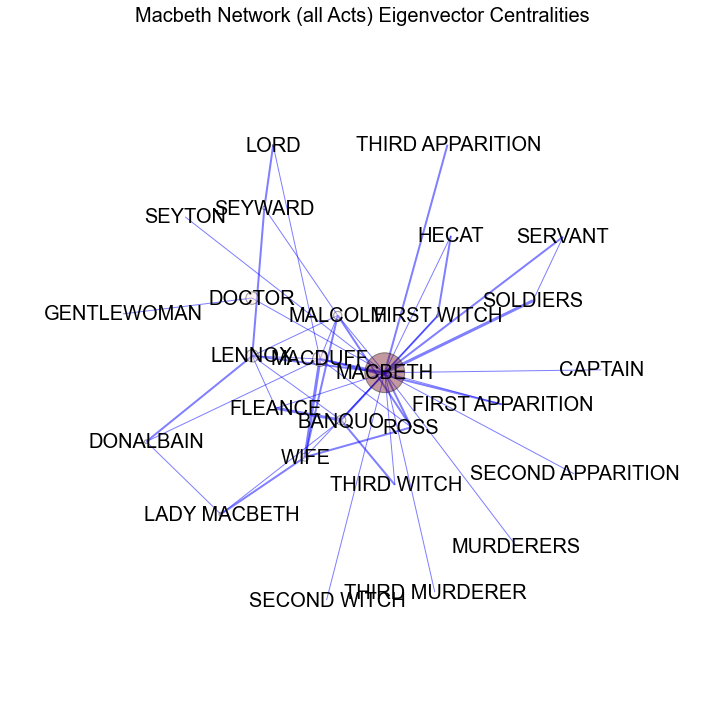

In [101]:
G=plot_total_graph_with_weights(graph_dic,nodper_dic)
weights={(nd[0],nd[1]):str(nd[2]['weight']) for nd in G.edges(data=True)}
# G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
ecc = nx.betweenness_centrality(G)
ecs={}
for k,v in bc.items():
    ecs[v]=k
for k in sorted(ecs,reverse=True):
    print labels[ecs[k]], 'has eigenvector centrality', k
pos=pos_dict[5]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=bc.keys(),
                       node_size = [d*2000 for d in bc.values()],node_color=bc.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Macbeth Network (all Acts) Eigenvector Centralities",fontsize=20)
kk=plt.axis('off')

### PageRank

MACBETH has PageRank 0.358908044539
THIRD WITCH has PageRank 0.158346636614
FIRST WITCH has PageRank 0.130612832871
BANQUO has PageRank 0.101157958386
ROSS has PageRank 0.0977241547635
MALCOLM has PageRank 0.0602827653413
CAPTAIN has PageRank 0.0464838037433


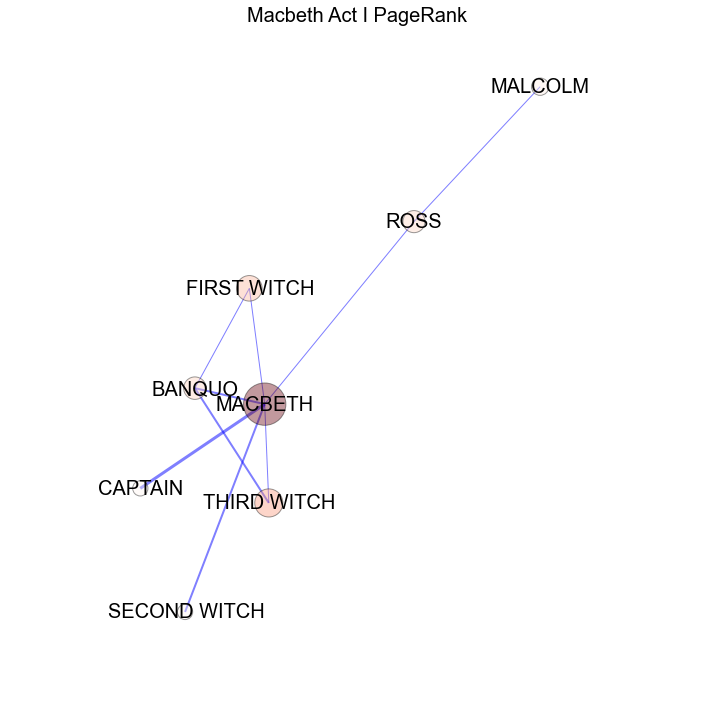

In [102]:
G = graph_dic[ract_dic[cnum[0]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
pr = nx.pagerank(G)
prs={}
for k,v in pr.items():
    prs[v]=k
for k in sorted(prs,reverse=True):
    print labels[prs[k]], 'has PageRank', k
pos=pos_dict[0]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=pr.keys(),
                       node_size = [d*5000 for d in pr.values()],node_color=pr.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Macbeth Act I PageRank",fontsize=20)
kk=plt.axis('off')

MACBETH has PageRank 0.274667226511
MACDUFF has PageRank 0.241060883026
DONALBAIN has PageRank 0.142259559666
ROSS has PageRank 0.119347436949
LADY MACBETH has PageRank 0.0818888854702
MALCOLM has PageRank 0.0726540083786
MURDERERS has PageRank 0.0681219999991


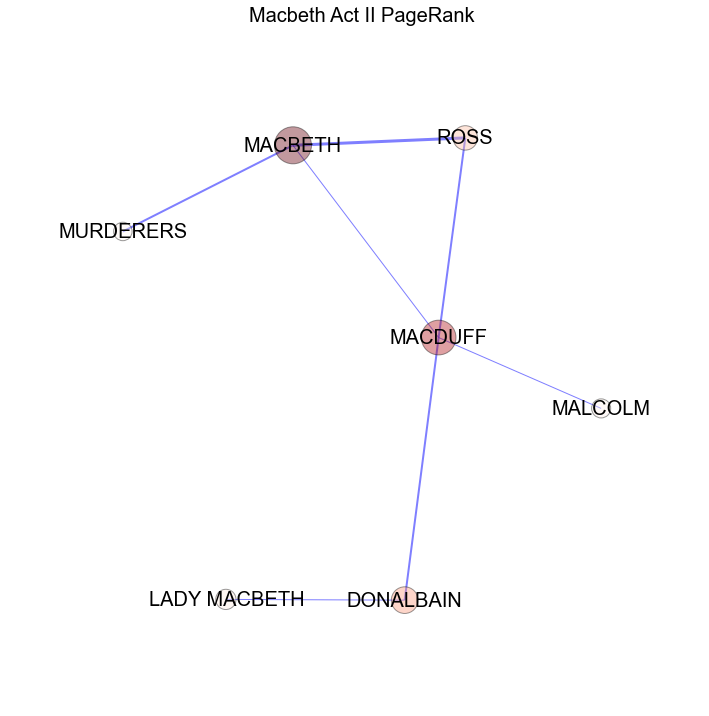

In [103]:
G = graph_dic[ract_dic[cnum[1]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
pr = nx.pagerank(G)
prs={}
for k,v in pr.items():
    prs[v]=k
for k in sorted(prs,reverse=True):
    print labels[prs[k]], 'has PageRank', k
pos=pos_dict[1]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=pr.keys(),
                       node_size = [d*5000 for d in pr.values()],node_color=pr.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Macbeth Act II PageRank",fontsize=20)
kk=plt.axis('off')

MACBETH has PageRank 0.252582078711
LENNOX has PageRank 0.146895627088
BANQUO has PageRank 0.143208016805
FLEANCE has PageRank 0.104437643447
MACDUFF has PageRank 0.0700838023563
HECAT has PageRank 0.0558782146536
LORD has PageRank 0.0543471410156
SEYWARD has PageRank 0.0338118209401
FIRST WITCH has PageRank 0.0265464463927
MALCOLM has PageRank 0.023200414087
THIRD MURDERER has PageRank 0.0220140103851
LADY MACBETH has PageRank 0.021780359646


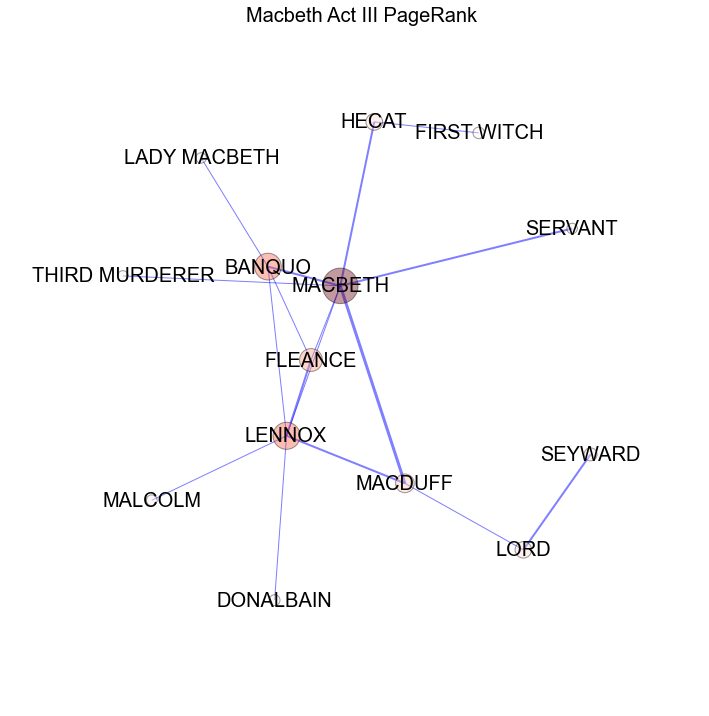

In [104]:
G = graph_dic[ract_dic[cnum[2]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
pr = nx.pagerank(G)
prs={}
for k,v in pr.items():
    prs[v]=k
for k in sorted(prs,reverse=True):
    print labels[prs[k]], 'has PageRank', k
pos=pos_dict[2]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=pr.keys(),
                       node_size = [d*5000 for d in pr.values()],node_color=pr.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Macbeth Act III PageRank",fontsize=20)
kk=plt.axis('off')

MACBETH has PageRank 0.301426124047
MACDUFF has PageRank 0.163019700426
MALCOLM has PageRank 0.155465443559
WIFE has PageRank 0.0978045164931
BANQUO has PageRank 0.0577139181227
FIRST APPARITION has PageRank 0.042967611128
SEYWARD has PageRank 0.0418656952532
ROSS has PageRank 0.0291267677614
LENNOX has PageRank 0.0278963050871
FIRST WITCH has PageRank 0.0275713060409


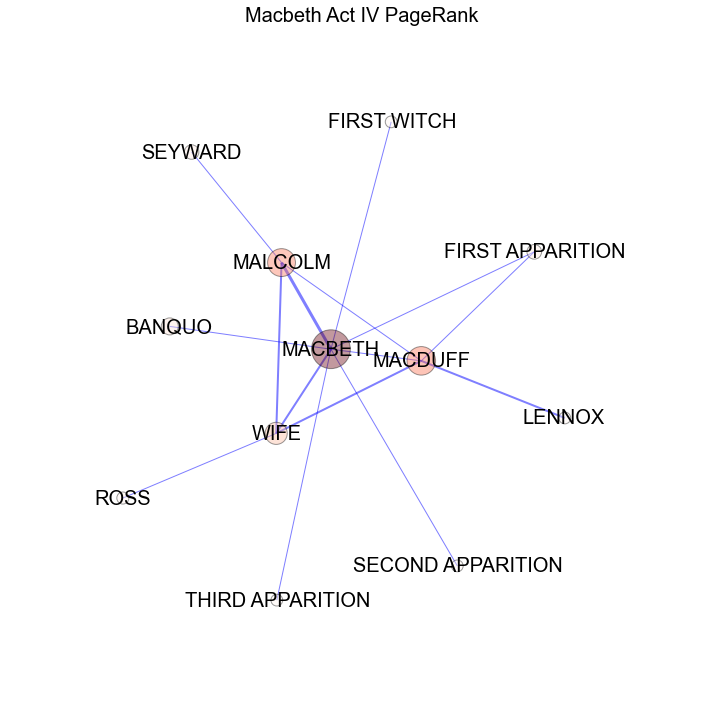

In [105]:
G = graph_dic[ract_dic[cnum[3]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
pr = nx.pagerank(G)
prs={}
for k,v in pr.items():
    prs[v]=k
for k in sorted(prs,reverse=True):
    print labels[prs[k]], 'has PageRank', k
pos=pos_dict[3]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=pr.keys(),
                       node_size = [d*5000 for d in pr.values()],node_color=pr.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Macbeth Act IV PageRank",fontsize=20)
kk=plt.axis('off')

MACBETH has PageRank 0.228984469543
MACDUFF has PageRank 0.119152233879
DOCTOR has PageRank 0.0854375025875
MALCOLM has PageRank 0.0777377274174
SEYWARD has PageRank 0.0769230769231
LADY MACBETH has PageRank 0.0729581622077
SOLDIERS has PageRank 0.0708482376284
WIFE has PageRank 0.0594255790626
BANQUO has PageRank 0.0425456794054
SERVANT has PageRank 0.031612128814
GENTLEWOMAN has PageRank 0.0296939307886
SEYTON has PageRank 0.0277581948208


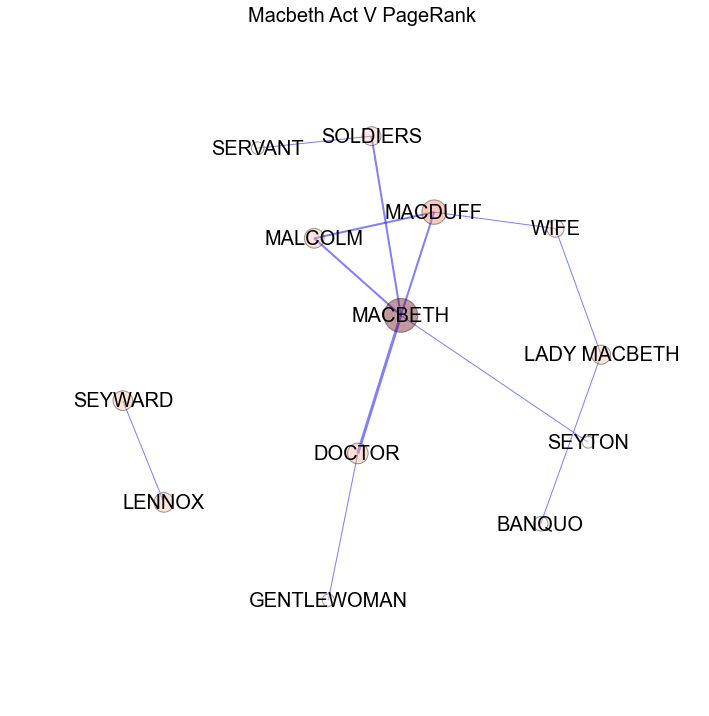

In [106]:
G = graph_dic[ract_dic[cnum[4]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
pr = nx.pagerank(G)
prs={}
for k,v in pr.items():
    prs[v]=k
for k in sorted(prs,reverse=True):
    print labels[prs[k]], 'has PageRank', k
pos=pos_dict[4]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=pr.keys(),
                       node_size = [d*5000 for d in pr.values()],node_color=pr.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Macbeth Act V PageRank",fontsize=20)
kk=plt.axis('off')

MACBETH has PageRank 0.299401891254
MACDUFF has PageRank 0.100023399478
BANQUO has PageRank 0.0788964266146
MALCOLM has PageRank 0.0699296862384
LENNOX has PageRank 0.0535580466469
FLEANCE has PageRank 0.0365680307051
WIFE has PageRank 0.0332700409449
FIRST WITCH has PageRank 0.0302276345872
DOCTOR has PageRank 0.0271024525803
THIRD WITCH has PageRank 0.0251869457515
ROSS has PageRank 0.0249598834013
SEYWARD has PageRank 0.0227676102534
LADY MACBETH has PageRank 0.0220720396821
SOLDIERS has PageRank 0.0199634442323
HECAT has PageRank 0.0177906665884
DONALBAIN has PageRank 0.0177360759431
SERVANT has PageRank 0.015188296124
LORD has PageRank 0.0140901896812
FIRST APPARITION has PageRank 0.0132285038963
GENTLEWOMAN has PageRank 0.011314826621
MURDERERS has PageRank 0.00953198696792


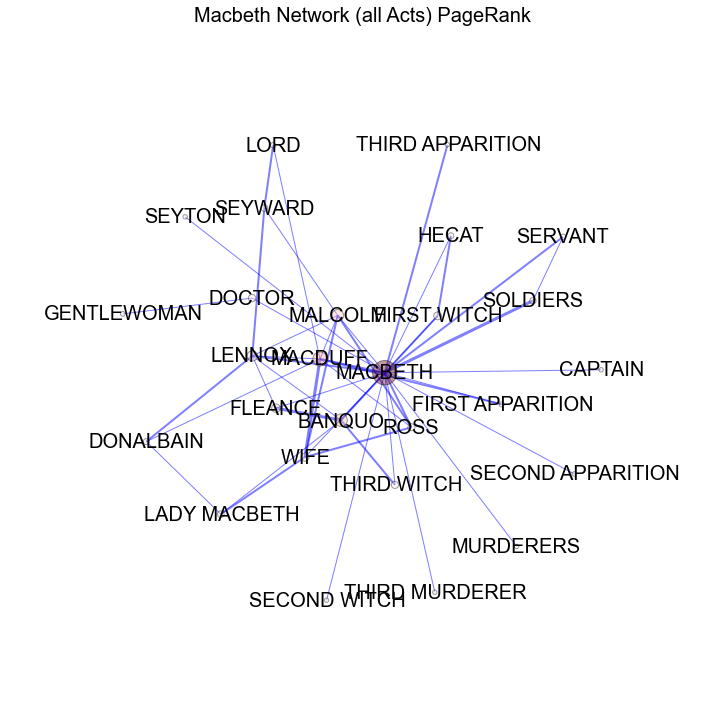

In [107]:
G=plot_total_graph_with_weights(graph_dic,nodper_dic)
weights={(nd[0],nd[1]):str(nd[2]['weight']) for nd in G.edges(data=True)}
# G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
pr = nx.pagerank(G)
prs={}
for k,v in pr.items():
    prs[v]=k
for k in sorted(prs,reverse=True):
    print labels[prs[k]], 'has PageRank', k
pos=pos_dict[5]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=pr.keys(),
                       node_size = [d*2000 for d in pr.values()],node_color=pr.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Macbeth Network (all Acts) PageRank",fontsize=20)
kk=plt.axis('off')

Correspondence between IDs of nodes and names of characters (actors):

{0: 'DONALBAIN', 1: 'SERVANT', 3: 'THIRD WITCH', 7: 'SOLDIERS', 9: 'SECOND APPARITION', 11: 'LENNOX', 12: 'MACDUFF', 13: 'HECAT', 14: 'DOCTOR', 15: 'MALCOLM', 17: 'LADY MACBETH', 19: 'THIRD MURDERER', 20: 'BANQUO', 21: 'FIRST WITCH', 22: 'LORD', 23: 'FIRST APPARITION', 25: 'SEYWARD', 28: 'GENTLEWOMAN', 29: 'FLEANCE', 30: 'WIFE', 31: 'SEYTON', 32: 'MACBETH', 34: 'SECOND WITCH', 35: 'THIRD APPARITION', 36: 'CAPTAIN', 37: 'MURDERERS', 38: 'ROSS'}


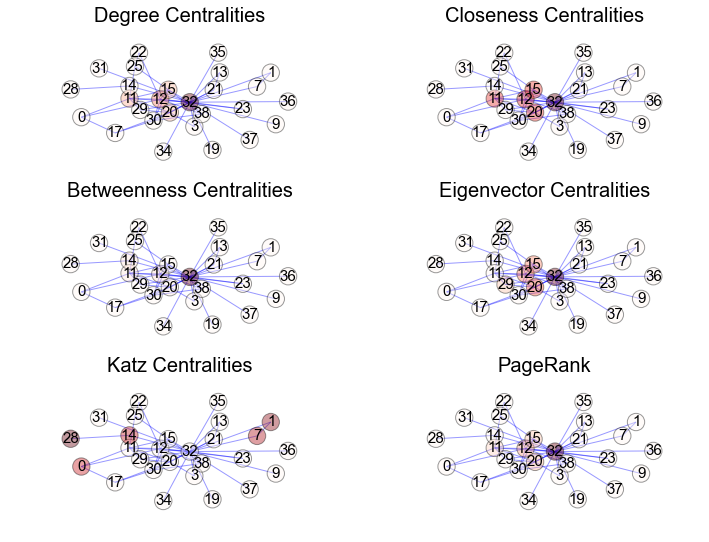

In [108]:
G=plot_total_graph_with_weights(graph_dic,nodper_dic)
draw_centralities_subplots(G,pos,withLabels=True,labfs=15)
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
# print 'The IDs of nodes correspond to the following characters (actors):'
print 'Correspondence between IDs of nodes and names of characters (actors):'
print
print labels

## Communities

Number of communities of Macbeth Act I network = 2
Community partition of Macbeth Act I network:
[['MACBETH', 'SECOND WITCH', 'THIRD WITCH', 'CAPTAIN', 'BANQUO', 'FIRST WITCH'], ['ROSS', 'MALCOLM']]
Community modularity of Macbeth Act I network = 0.1199


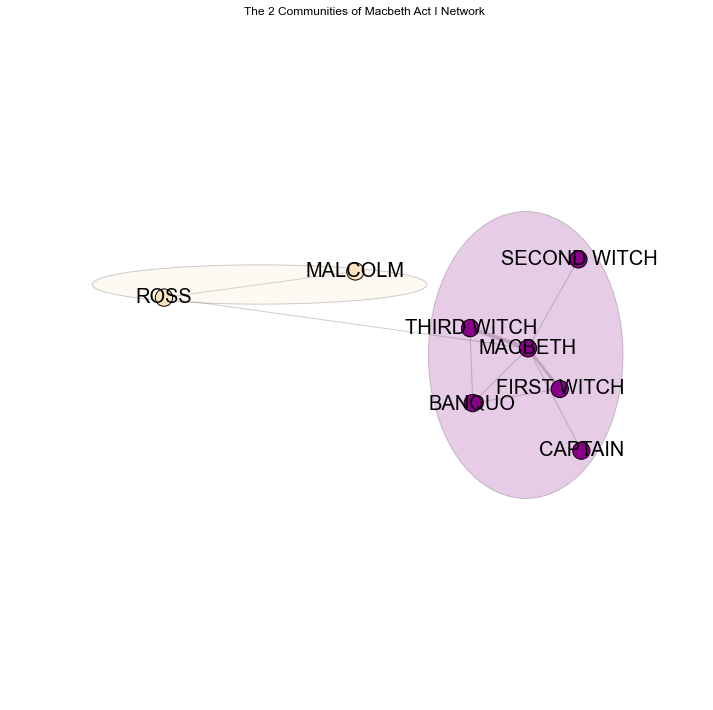

In [109]:
from chAs import draw_comms,modul_arity
import community as comm

G = graph_dic[ract_dic[cnum[0]]]
G.remove_nodes_from(nx.isolates(G))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}

part=comm.best_partition(G) 
print 'Number of communities of Macbeth Act I network =', max(part.values())+1
print 'Community partition of Macbeth Act I network:'
parLis=[]
partdi={}
for i,k in part.items():
    if k not in partdi:
        partdi[k]=[nodper_dic[i]]
    else:
        partdi[k].append(nodper_dic[i])
for i,k in partdi.items():
    parLis.append(k)
print parLis
print 'Community modularity of Macbeth Act I network =', "%.4f" % comm.modularity(part,G)

d=0.8 
dd=0.8
c=1.2
cc=1.4
alpha=0.2
ealpha=.2
vcc={}
sstt="The %s Communities of Macbeth Act I Network" %(max(part.values())+1)

draw_comms(G,G.nodes(),[],[],[] ,part,part,d,dd,c,cc,alpha,ealpha,nodper_dic,sstt)

Number of communities of Macbeth Act II network = 3
Community partition of Macbeth Act II network:
[['DONALBAIN', 'LADY MACBETH'], ['MACBETH', 'MURDERERS'], ['ROSS', 'MACDUFF', 'MALCOLM']]
Community modularity of Macbeth Act II network = 0.2901


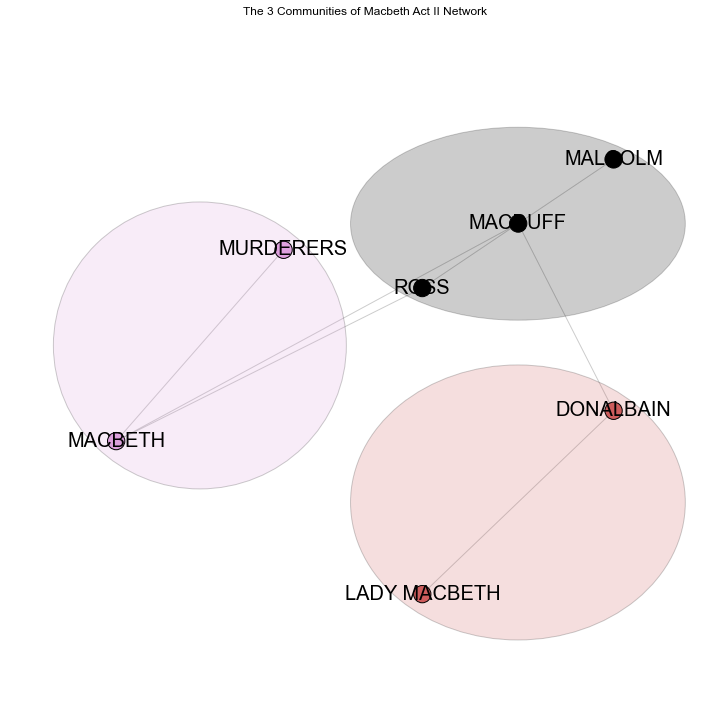

In [110]:
from chAs import draw_comms,modul_arity
import community as comm

G = graph_dic[ract_dic[cnum[1]]]
G.remove_nodes_from(nx.isolates(G))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}

part=comm.best_partition(G) 
print 'Number of communities of Macbeth Act II network =', max(part.values())+1
print 'Community partition of Macbeth Act II network:'
parLis=[]
partdi={}
for i,k in part.items():
    if k not in partdi:
        partdi[k]=[nodper_dic[i]]
    else:
        partdi[k].append(nodper_dic[i])
for i,k in partdi.items():
    parLis.append(k)
print parLis
print 'Community modularity of Macbeth Act II network =', "%.4f" % comm.modularity(part,G)

d=0.8 
dd=0.8
c=1.2
cc=1.4
alpha=0.2
ealpha=.2
vcc={}
sstt="The %s Communities of Macbeth Act II Network" %(max(part.values())+1)

draw_comms(G,G.nodes(),[],[],[] ,part,part,d,dd,c,cc,alpha,ealpha,nodper_dic,sstt)

Number of communities of Macbeth Act III network = 4
Community partition of Macbeth Act III network:
[['DONALBAIN', 'LENNOX', 'MALCOLM', 'FLEANCE'], ['SERVANT', 'MACBETH', 'LADY MACBETH', 'THIRD MURDERER', 'BANQUO'], ['MACDUFF', 'LORD', 'SEYWARD'], ['HECAT', 'FIRST WITCH']]
Community modularity of Macbeth Act III network = 0.2144


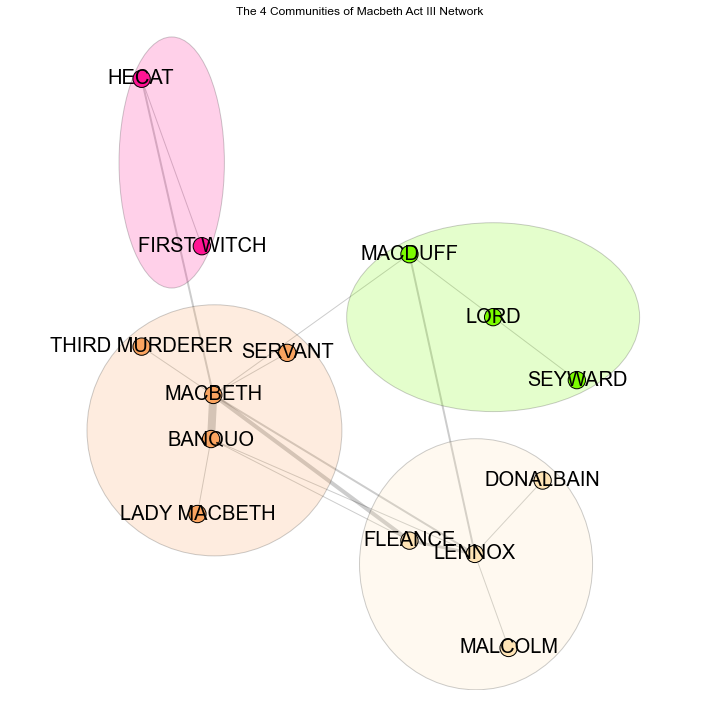

In [111]:
from chAs import draw_comms,modul_arity
import community as comm

G = graph_dic[ract_dic[cnum[2]]]
G.remove_nodes_from(nx.isolates(G))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}

part=comm.best_partition(G) 
print 'Number of communities of Macbeth Act III network =', max(part.values())+1
print 'Community partition of Macbeth Act III network:'
parLis=[]
partdi={}
for i,k in part.items():
    if k not in partdi:
        partdi[k]=[nodper_dic[i]]
    else:
        partdi[k].append(nodper_dic[i])
for i,k in partdi.items():
    parLis.append(k)
print parLis
print 'Community modularity of Macbeth Act III network =', "%.4f" % comm.modularity(part,G)

d=0.8 
dd=0.8
c=1.2
cc=1.4
alpha=0.2
ealpha=.2
vcc={}
sstt="The %s Communities of Macbeth Act III Network" %(max(part.values())+1)

draw_comms(G,G.nodes(),[],[],[] ,part,part,d,dd,c,cc,alpha,ealpha,nodper_dic,sstt)

Number of communities of Macbeth Act IV network = 2
Community partition of Macbeth Act IV network:
[['MACBETH', 'THIRD APPARITION', 'SECOND APPARITION', 'MALCOLM', 'BANQUO', 'FIRST WITCH', 'SEYWARD'], ['ROSS', 'LENNOX', 'MACDUFF', 'FIRST APPARITION', 'WIFE']]
Community modularity of Macbeth Act IV network = 0.1968


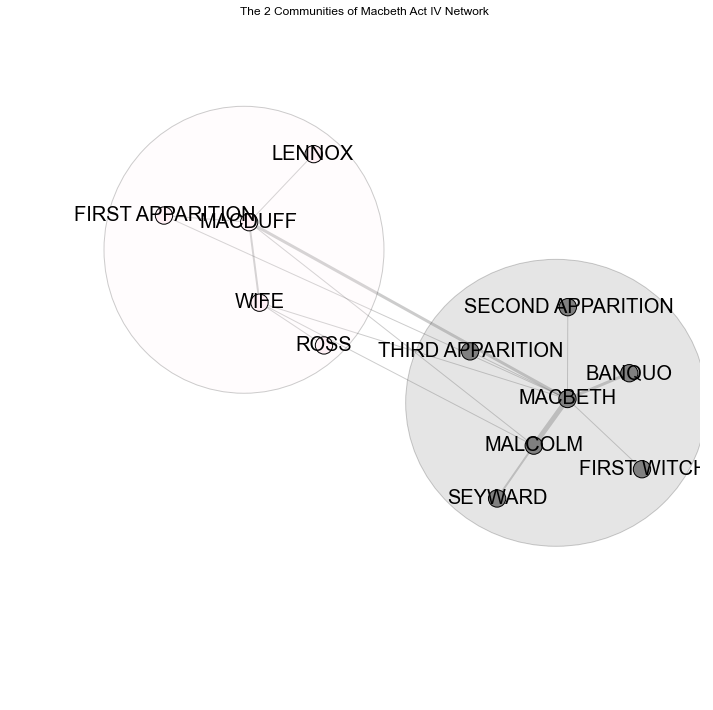

In [112]:
from chAs import draw_comms,modul_arity
import community as comm

G = graph_dic[ract_dic[cnum[3]]]
G.remove_nodes_from(nx.isolates(G))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}

part=comm.best_partition(G) 
print 'Number of communities of Macbeth Act IV network =', max(part.values())+1
print 'Community partition of Macbeth Act IV network:'
parLis=[]
partdi={}
for i,k in part.items():
    if k not in partdi:
        partdi[k]=[nodper_dic[i]]
    else:
        partdi[k].append(nodper_dic[i])
for i,k in partdi.items():
    parLis.append(k)
print parLis
print 'Community modularity of Macbeth Act IV network =', "%.4f" % comm.modularity(part,G)

d=0.8 
dd=0.8
c=1.2
cc=1.4
alpha=0.2
ealpha=.2
vcc={}
sstt="The %s Communities of Macbeth Act IV Network" %(max(part.values())+1)

draw_comms(G,G.nodes(),[],[],[] ,part,part,d,dd,c,cc,alpha,ealpha,nodper_dic,sstt)

Number of communities of Macbeth Act V network = 4
Community partition of Macbeth Act V network:
[['MACBETH', 'SERVANT', 'SOLDIERS', 'DOCTOR', 'GENTLEWOMAN', 'SEYTON'], ['LENNOX', 'SEYWARD'], ['MACDUFF', 'MALCOLM'], ['LADY MACBETH', 'BANQUO', 'WIFE']]
Community modularity of Macbeth Act V network = 0.3503


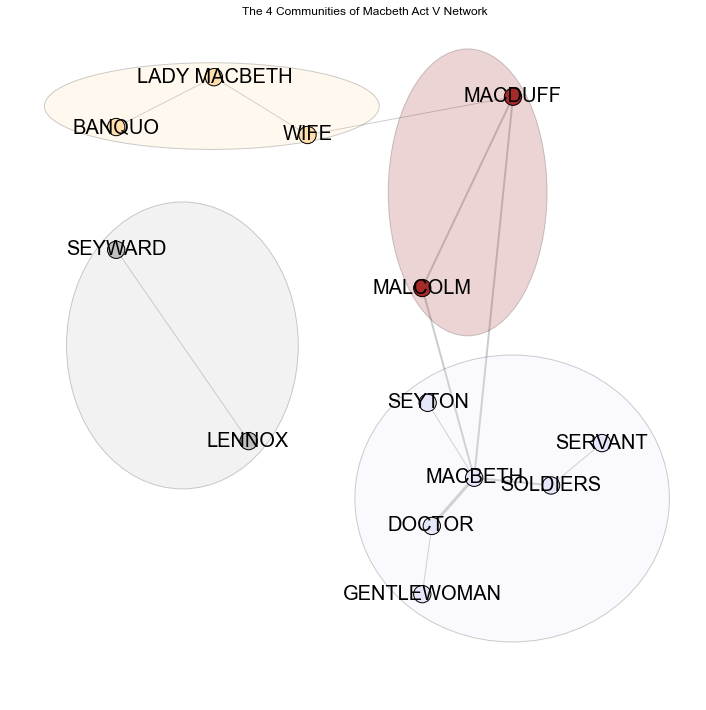

In [113]:
from chAs import draw_comms,modul_arity
import community as comm

G = graph_dic[ract_dic[cnum[4]]]
G.remove_nodes_from(nx.isolates(G))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}

part=comm.best_partition(G) 
print 'Number of communities of Macbeth Act V network =', max(part.values())+1
print 'Community partition of Macbeth Act V network:'
parLis=[]
partdi={}
for i,k in part.items():
    if k not in partdi:
        partdi[k]=[nodper_dic[i]]
    else:
        partdi[k].append(nodper_dic[i])
for i,k in partdi.items():
    parLis.append(k)
print parLis
print 'Community modularity of Macbeth Act V network =', "%.4f" % comm.modularity(part,G)

d=0.8 
dd=0.8
c=1.2
cc=1.4
alpha=0.2
ealpha=.2
vcc={}
sstt="The %s Communities of Macbeth Act V Network" %(max(part.values())+1)

draw_comms(G,G.nodes(),[],[],[] ,part,part,d,dd,c,cc,alpha,ealpha,nodper_dic,sstt)

Number of communities of Macbeth network (all Acts) = 3
Community partition of Macbeth network (all Acts):
[['DONALBAIN', 'LENNOX', 'LADY MACBETH', 'FLEANCE'], ['SERVANT', 'THIRD WITCH', 'SOLDIERS', 'SECOND APPARITION', 'HECAT', 'DOCTOR', 'THIRD MURDERER', 'BANQUO', 'FIRST WITCH', 'GENTLEWOMAN', 'SEYTON', 'MACBETH', 'SECOND WITCH', 'THIRD APPARITION', 'CAPTAIN', 'MURDERERS'], ['MACDUFF', 'MALCOLM', 'LORD', 'FIRST APPARITION', 'SEYWARD', 'WIFE', 'ROSS']]
Community modularity of Macbeth network (all Acts) = 0.2272


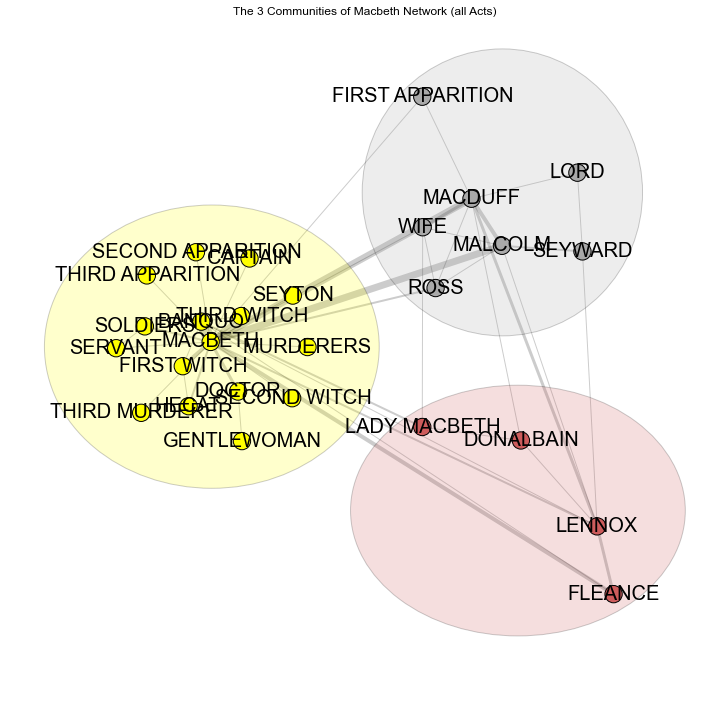

In [117]:
from chAs import draw_comms,modul_arity
import community as comm

G=plot_total_graph_with_weights(graph_dic,nodper_dic)
weights={(nd[0],nd[1]):str(nd[2]['weight']) for nd in G.edges(data=True)}
# G.remove_nodes_from(nx.isolates(G))
# G = graph_dic[ract_dic[cnum[0]]]
# G.remove_nodes_from(nx.isolates(G))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}

part=comm.best_partition(G) 
print 'Number of communities of Macbeth network (all Acts) =', max(part.values())+1
print 'Community partition of Macbeth network (all Acts):'
parLis=[]
partdi={}
for i,k in part.items():
    if k not in partdi:
        partdi[k]=[nodper_dic[i]]
    else:
        partdi[k].append(nodper_dic[i])
for i,k in partdi.items():
    parLis.append(k)
print parLis
print 'Community modularity of Macbeth network (all Acts) =', "%.4f" % comm.modularity(part,G)

d=0.8 
dd=0.8
c=1.2
cc=1.4
alpha=0.2
ealpha=.2
vcc={}
sstt="The %s Communities of Macbeth Network (all Acts)" %(max(part.values())+1)

draw_comms(G,G.nodes(),[],[],[] ,part,part,d,dd,c,cc,alpha,ealpha,nodper_dic,sstt)